# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Egi Erlangga
- **Email:** egimon391@gmail.com
- **ID Dicoding:** equinox391

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana tren data pembelian pelanggan setiap bulan dalam periode Tahun 2016-2018 jika dilihat dari total belanja (pengeluaran pelanggan), pembelian (terjadinya transaksi), dan jenis barang populer di tiap bulannya? Pada periode tersebut, kapan pembelian paling banyak terjadi?

- **Pertanyaan 2** : Dalam kurun waktu 2016-2018, di state dan di kota manakah yang terdapat konsentrasi pelanggan tertinggi? Bagaimana segmentasi kita lakukan pada pelanggan yang ada di dalam e-commerce ini jika dikelompokkan dari kebiasaan **(RFM)** mereka?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import urllib
import zipfile
import matplotlib.image as mpimg
from scipy import stats
import datetime as dt

## Data Wrangling

### Gathering Data

#### Mengimpor Dataset (Skip Bila Dataset Sudah Ada)

Import dataset melalui kaggle

In [ ]:
# ! pip install -q kaggle
# from google.colab import files

# files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"egierlangga","key":"82453f6f424311b748b5a7ff7172b45d"}'}

Membuat direktori untuk file dataset kaggle

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Mengganti permission untuk file kaggle

In [ ]:
# ! chmod 600 ~/.kaggle/kaggle.json

Melakukan download file secara langsung dari kaggle

**Note**: kalau sudah pernah didownload nanti tulisannya bakal jadi skipping, karena udah ada filenya

In [ ]:
# !kaggle datasets download -d olistbr/brazilian-ecommerce

brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


Karena file yang didwonload berupa zip, extract filenya dahulu agar bisa digunakan

In [ ]:
# # Membuka file ZIP menggunakan zipfile dan memberikan nama 'brazilian-ecommerce.zip'
# zip_ref = zipfile.ZipFile('brazilian-ecommerce.zip', 'r')

# # Mengekstrak isi file ZIP ke dalam folder 'datasets/'
# zip_ref.extractall('data/')

# # Menutup file ZIP setelah selesai digunakan
# zip_ref.close()


#### Memuat Seluruh Dataset

Customer Dataset

In [ ]:
df_customers=pd.read_csv('data/olist_customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Geolocation Dataset

In [ ]:
df_geolocation=pd.read_csv('data/olist_geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Order Items Dataset

In [ ]:
df_order_items=pd.read_csv('data/olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Order Payments Dataset

In [ ]:
df_order_payment=pd.read_csv('data/olist_order_payments_dataset.csv')
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Order Reviews Dataset

In [ ]:
df_order_reviews=pd.read_csv('data/olist_order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Orders Dataset

In [ ]:
df_orders=pd.read_csv('data/olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Products Dataset

In [ ]:
df_products=pd.read_csv('data/olist_products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Sellers Dataset

In [ ]:
df_sellers=pd.read_csv('data/olist_sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Product Category Dataset

In [ ]:
df_product_category=pd.read_csv('data/product_category_name_translation.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

#### A. Memeriksa Kesalahan Data Type

In [ ]:
# Print info() for df_customers
print("Informasi df_customers:")
df_customers.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_geolocation
print("Informasi df_geolocation:")
df_geolocation.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_order_items
print("Informasi df_order_items:")
df_order_items.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_order_payment
print("Informasi df_order_payment:")
df_order_payment.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_order_reviews
print("Informasi df_order_reviews:")
df_order_reviews.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_orders
print("Informasi df_orders:")
df_orders.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_products
print("Informasi df_products:")
df_products.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_sellers
print("Informasi df_sellers:")
df_sellers.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_product_category
print("Informasi df_product_category:")
df_product_category.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi


Informasi df_customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Informasi df_geolocation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64


Setelah diperiksa, ada beberapa data type yang tidak tepat. Antara lain ditemukan pada dataset:
- df_order_items
- df_order_reviews
- df_orders

#### B. Memeriksa Data Ganda

In [ ]:
# Menampilkan jumlah data yang terduplikasi untuk setiap DataFrame
print(f'{"="*60}\n'
      f'Duplikasi pada df_customers         : {df_customers.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_geolocation       : {df_geolocation.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_order_items       : {df_order_items.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_order_payment     : {df_order_payment.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_order_review      : {df_order_reviews.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_orders            : {df_orders.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_products          : {df_products.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_sellers           : {df_sellers.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_product_category  : {df_product_category.duplicated().sum()}\n'
      f'{"="*60}\n')


Duplikasi pada df_customers         : 0
Duplikasi pada df_geolocation       : 261831
Duplikasi pada df_order_items       : 0
Duplikasi pada df_order_payment     : 0
Duplikasi pada df_order_review      : 0
Duplikasi pada df_orders            : 0
Duplikasi pada df_products          : 0
Duplikasi pada df_sellers           : 0
Duplikasi pada df_product_category  : 0



Setelah diperiksa, Terdapat banyak sekali data duplikat di **geolocation** dataset

#### C. Memeriksa Missing Value (Null)

In [ ]:
# Menampilkan jumlah nilai yang hilang (NaN) untuk setiap DataFrame
print(f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_customers        \n\n{df_customers.isna().sum()}\n\n'
      f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_geolocation      \n\n{df_geolocation.isna().sum()}\n\n'
      f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_order_items      \n\n{df_order_items.isna().sum()}\n\n'
      f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_order_payment    \n\n{df_order_payment.isna().sum()}\n\n'
      f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_order_review     \n\n{df_order_reviews.isna().sum()}\n\n'
      f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_orders            \n\n{df_orders.isna().sum()}\n\n'
      f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_products         \n\n{df_products.isna().sum()}\n\n'
      f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_sellers           \n\n{df_sellers.isna().sum()}\n\n'
      f'{"="*60}\n\n'
      f'Jumlah Nilai Hilang pada df_product_category \n\n{df_product_category.isna().sum()}\n\n'
      f'{"="*60}\n\n')



Jumlah Nilai Hilang pada df_customers        

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Jumlah Nilai Hilang pada df_geolocation      

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Jumlah Nilai Hilang pada df_order_items      

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Jumlah Nilai Hilang pada df_order_payment    

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Jumlah Nilai Hilang pada df_order_review     

review_id                      0
order_id                       0
review_score      

Setelah diperiksa, ada beberapa dataset yang memiliki missing value, yaitu:
- df_order_review
- df_orders
- df_products

#### D. Memeriksa Parameter Statistik Dataset

In [ ]:
# Menampilkan ringkasan statistik untuk setiap DataFrame
print(f'{"="*60}\n\n'
      f'Rangkuman Statistik df_customers        \n\n{df_customers.describe()}\n\n'
      f'{"="*60}\n\n'
      f'Rangkuman Statistik df_geolocation      \n\n{df_geolocation.describe()}\n\n'
      f'{"="*60}\n\n'
      f'Rangkuman Statistik df_order_items      \n\n{df_order_items.describe()}\n\n'
      f'{"="*60}\n\n'
      f'Rangkuman Statistik df_order_payment    \n\n{df_order_payment.describe()}\n\n'
      f'{"="*60}\n\n'
      f'Rangkuman Statistik df_order_review     \n\n{df_order_reviews.describe()}\n\n'
      f'{"="*60}\n\n'
      f'Rangkuman Statistik df_orders           \n\n{df_orders.describe()}\n\n'
      f'{"="*60}\n\n'
      f'Rangkuman Statistik df_products         \n\n{df_products.describe()}\n\n'
      f'{"="*60}\n\n'
      f'Rangkuman Statistik df_sellers           \n\n{df_sellers.describe()}\n\n'
      f'{"="*60}\n\n'
      f'Rangkuman Statistik df_product_category \n\n{df_product_category.describe()}\n\n'
      f'{"="*60}\n\n')



Rangkuman Statistik df_customers        

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


Rangkuman Statistik df_geolocation      

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02


Ra

Setelah diperiksa sepintas, tidak ada yang aneh pada integritas data yang kini kita miliki. Hanya terdapat beberapa anomali kecil yang bisa diabaikan.

### Cleaning Data

#### A. Mengatasi Kesalahan Data Type

Pada Order Item Dataset

In [ ]:
# Daftar kolom yang berisi informasi tanggal pada dataframe df_order_items
order_item_col = ['shipping_limit_date']

# Iterasi melalui setiap kolom tanggal dalam daftar order_item_col
for col in order_item_col:
    # Mengonversi nilai dalam kolom tersebut menjadi tipe data datetime menggunakan fungsi pd.to_datetime()
    df_order_items[col] = pd.to_datetime(df_order_items[col])

Pada Order Review Dataset

In [ ]:
# Daftar kolom yang berisi informasi tanggal pada dataframe df_order_reviews
order_review_col = ['review_creation_date', 'review_answer_timestamp']

# Iterasi melalui setiap kolom tanggal dalam daftar order_review_col
for col in order_review_col:
    # Mengonversi nilai dalam kolom tersebut menjadi tipe data datetime menggunakan fungsi pd.to_datetime()
    df_order_reviews[col] = pd.to_datetime(df_order_reviews[col])


Pada Orders Dataset

In [ ]:
# Daftar kolom yang berisi informasi tanggal pada dataframe df_orders
orders_col = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# Iterasi melalui setiap kolom tanggal dalam daftar orders_col
for col in orders_col:
    # Mengonversi nilai dalam kolom tersebut menjadi tipe data datetime menggunakan fungsi pd.to_datetime()
    df_orders[col] = pd.to_datetime(df_orders[col])

Memastikan ulang tipe data sudah benar

In [ ]:
# Print info() for df_order_items
print("Informasi df_order_items:")
df_order_items.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_order_reviews
print("Informasi df_order_reviews:")
df_order_reviews.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi

# Print info() for df_orders
print("Informasi df_orders:")
df_orders.info()
print('\n' + '=' * 60 + '\n')  # Batas antara informasi


Informasi df_order_items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Informasi df_order_reviews:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 

Tipe data tanggal yang awalnya object sudah berubah menjadi date time

#### B. Mengatasi Data Ganda (Duplikat)

Hanya geolocation yang terdeteksi memiliki data duplikat.

In [ ]:
df_geolocation.drop_duplicates(inplace=True)

Cek bahwa sudah tidak ada data duplikat lagi

In [ ]:
# Menampilkan jumlah data yang terduplikasi untuk setiap DataFrame
print(f'{"="*60}\n'
      f'Duplikasi pada df_customers         : {df_customers.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_geolocation       : {df_geolocation.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_order_items       : {df_order_items.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_order_payment     : {df_order_payment.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_order_review      : {df_order_reviews.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_orders            : {df_orders.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_products          : {df_products.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_sellers           : {df_sellers.duplicated().sum()}\n'
      f'{"="*60}\n'
      f'Duplikasi pada df_product_category  : {df_product_category.duplicated().sum()}\n'
      f'{"="*60}\n')


Duplikasi pada df_customers         : 0
Duplikasi pada df_geolocation       : 0
Duplikasi pada df_order_items       : 0
Duplikasi pada df_order_payment     : 0
Duplikasi pada df_order_review      : 0
Duplikasi pada df_orders            : 0
Duplikasi pada df_products          : 0
Duplikasi pada df_sellers           : 0
Duplikasi pada df_product_category  : 0



Sudah tidak ada data duplikat lagi

#### C. Mengatasi Data Hilang (Null)

##### Data Hilang Pada Order Reviews

Karena pada Order Reviews, data yang hilang adalah data judul dan pesan dalam komentar yang bersifat subjektif, maka dapat kita atasi dengan metode filling data. Menilai ini tidak akan mempengaruhi integritas data selagi diisi dengan data yang netral.

In [ ]:
# Mengisi nilai-nilai yang hilang pada kolom 'review_comment_title' dengan teks "Untitled"
df_order_reviews["review_comment_title"].fillna("Untitled", inplace=True)

# Mengisi nilai-nilai yang hilang pada kolom 'review_comment_message' dengan teks "No Comment"
df_order_reviews["review_comment_message"].fillna("No Comment", inplace=True)

Memeriksa apakah Order Reviews sudah dibersihkan dari Null Value

In [ ]:
# Memeriksa apakah ada null value
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Data Hilang Pada Orders

Karena data yang hilang pada orders berupa data waktu yang bisa dikatakan objektif dan penting, maka kita tidak bisa sembarangan menghapusnya atau menggantinya dengan tanggal sembarangan. Jadi bisa dibiarkan saja.

In [ ]:
# Menampilkan apakah ada null value di orders
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

##### Data Hilang Pada Products

Products memiliki banyak sekali jenis data yang hilang pada kolom yang berbeda, antara lain adalah kategori, panjang nama produk, panjang deskripsi, jumlah foto, berat, panjang, tinggi, dan lebar. Bisa dibilang data ini bisa di drop ataupun di fill (tergantung kebutuhan). Pada kali ini saya akan coba fill datanya menggunakan nilai mean untuk yang bersifat kuantitatif, dan menggantinya menjadi netral untuk yang non-kuantitatif pada tiap kolom tersebut.

In [ ]:
# Mengganti nilai-nilai yang hilang pada kolom "product_category_name" dengan string "Others"
df_products["product_category_name"].fillna("Others", inplace=True)

# Mengganti nilai-nilai yang hilang pada kolom "product_name_lenght" dengan string "Untitled"
df_products["product_name_lenght"].fillna("Untitled", inplace=True)

# Mengganti nilai-nilai yang hilang pada kolom "product_description_lenght" dengan string "No Comment"
df_products["product_description_lenght"].fillna("No Comment", inplace=True)

# Mengganti nilai-nilai yang hilang pada kolom "product_photos_qty" dengan nilai rata-rata yaitu 2.1
df_products["product_photos_qty"].fillna(2.1, inplace=True)

# Mengganti nilai-nilai yang hilang pada kolom "product_weight_g" dengan nilai rata-rata yaitu 2276
df_products["product_weight_g"].fillna(2276, inplace=True)

# Mengganti nilai-nilai yang hilang pada kolom "product_length_cm" dengan nilai rata-rata yaitu 30
df_products["product_length_cm"].fillna(30, inplace=True)

# Mengganti nilai-nilai yang hilang pada kolom "product_height_cm" dengan nilai rata-rata yaitu 16
df_products["product_height_cm"].fillna(16, inplace=True)

# Mengganti nilai-nilai yang hilang pada kolom "product_width_cm" dengan nilai rata-rata yaitu 23
df_products["product_width_cm"].fillna(23, inplace=True)


Periksa apakah masih ada data null

In [ ]:
df_products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Data null sudah dibersihkan secukupnya

## Exploratory Data Analysis (EDA)

### Explore Customers

In [ ]:
df_customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
df_customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
df_customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore Geolocation

In [ ]:
df_geolocation.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [ ]:
df_geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

### Explore Order Items

In [ ]:
df_order_items.describe(include='all')

<ipython-input-102-842a32f60c79>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_order_items.describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [ ]:
df_order_items.groupby('shipping_limit_date').size().sort_values(ascending=False)

shipping_limit_date
2017-07-21 18:25:23    21
2018-03-01 02:50:48    21
2017-08-30 14:30:23    20
2017-11-30 10:30:51    15
2017-12-21 02:30:41    15
                       ..
2017-11-20 22:15:29     1
2017-11-20 22:10:41     1
2017-11-20 22:06:56     1
2017-11-20 22:06:42     1
2018-01-23 13:50:15     1
Length: 93318, dtype: int64

In [ ]:
df_order_items.groupby('shipping_limit_date').size().sort_index(ascending=False)

shipping_limit_date
2020-04-09 22:35:08    2
2020-02-05 03:30:51    1
2020-02-03 20:23:22    1
2018-09-18 21:10:15    1
2018-09-14 12:30:56    1
                      ..
2016-10-08 13:26:12    1
2016-10-08 10:45:33    1
2016-10-08 10:34:01    1
2016-09-19 23:11:33    3
2016-09-19 00:15:34    1
Length: 93318, dtype: int64

In [ ]:
df_order_items.groupby('price').size().sort_values(ascending=False)

price
59.90      2481
69.90      1987
49.90      1953
89.90      1548
99.90      1432
           ... 
49.69         1
203.37        1
203.60        1
203.80        1
6735.00       1
Length: 5968, dtype: int64

### Explore Order Payments

In [ ]:
df_order_payment.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
df_order_payment.groupby('payment_type').size().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
dtype: int64

In [ ]:
df_order_payment.groupby('payment_installments').size().sort_values(ascending=False)

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
dtype: int64

In [ ]:
df_order_payment.groupby('payment_value').size().sort_values(ascending=False)

payment_value
50.00       324
20.00       274
100.00      255
77.57       250
35.00       165
           ... 
222.87        1
222.89        1
222.91        1
222.95        1
13664.08      1
Length: 29077, dtype: int64

### Explore Orders

In [ ]:
df_orders.describe(include='all')

<ipython-input-110-a2209ab39e3a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orders.describe(include='all')
<ipython-input-110-a2209ab39e3a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orders.describe(include='all')
<ipython-input-110-a2209ab39e3a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orders.describe(include='all')
<ipython-input-110-a2209ab39e3a>:1: FutureW

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


### Explore Products & Product Category Dataset

In [ ]:
productall_df = pd.merge(
    left=df_products,
    right=df_product_category,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
productall_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
productall_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32951,32951,32951.0,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32328
unique,32951,74,67.0,2961,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,No Comment,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,2182.0,610,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,NaN,NaN,2.187339,2276.472459,30.815028,16.937604,23.196716,NaN
std,NaN,NaN,NaN,NaN,1.720656,4281.908773,16.913946,13.637142,12.078681,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,NaN,NaN,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [ ]:
productall_df.groupby('product_category_name').product_id.nunique().sort_values(ascending=False).head(20)

product_category_name
cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
papelaria                             849
fashion_bolsas_e_acessorios           849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
Others                                610
eletronicos                           517
construcao_ferramentas_construcao     400
Name: product_id, dtype: int64

In [ ]:
productall_df.groupby('product_category_name_english').product_id.nunique().sort_values(ascending=False).head(20)

product_category_name_english
bed_bath_table                     3029
sports_leisure                     2867
furniture_decor                    2657
health_beauty                      2444
housewares                         2335
auto                               1900
computers_accessories              1639
toys                               1411
watches_gifts                      1329
telephony                          1134
baby                                919
perfumery                           868
stationery                          849
fashion_bags_accessories            849
cool_stuff                          789
garden_tools                        753
pet_shop                            719
electronics                         517
construction_tools_construction     400
home_appliances                     370
Name: product_id, dtype: int64

### Explore Customers & Orders

In [ ]:
customers_orders_df = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


### Explore Payments & Reviews

In [ ]:
payments_reviews_df = pd.merge(
    left=df_order_payment,
    right=df_order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Untitled,No Comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Untitled,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Untitled,No Comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Untitled,No Comment,2017-12-21,2017-12-22 01:10:39


In [ ]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,Untitled,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,Untitled,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,Untitled,No Comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,Untitled,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,Untitled,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,No Comment,2018-08-24,2018-08-25 02:24:54


In [ ]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [ ]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Untitled,No Comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Untitled,No Comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Untitled,No Comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Untitled,No Comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore Items & Sellers

In [ ]:
item_seller_df = pd.merge(
    left=df_order_items,
    right=df_sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(20)

seller_city
sao paulo                694
curitiba                 127
rio de janeiro            96
belo horizonte            68
ribeirao preto            52
guarulhos                 50
ibitinga                  49
santo andre               45
campinas                  41
maringa                   40
sao jose do rio preto     33
sorocaba                  32
osasco                    32
sao bernardo do campo     32
brasilia                  28
porto alegre              28
londrina                  26
goiania                   23
joinville                 22
blumenau                  21
Name: seller_id, dtype: int64

In [ ]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(20)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
Name: seller_id, dtype: int64

### Explore All Data

In [ ]:
item_seller_df = pd.merge(
    left=df_order_items,
    right=df_sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(20)

seller_city
sao paulo                694
curitiba                 127
rio de janeiro            96
belo horizonte            68
ribeirao preto            52
guarulhos                 50
ibitinga                  49
santo andre               45
campinas                  41
maringa                   40
sao jose do rio preto     33
sorocaba                  32
osasco                    32
sao bernardo do campo     32
brasilia                  28
porto alegre              28
londrina                  26
goiania                   23
joinville                 22
blumenau                  21
Name: seller_id, dtype: int64

In [ ]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(20)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
Name: seller_id, dtype: int64

In [ ]:
sellers_df = pd.merge(
    left=productall_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [ ]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


Gabungkan semua dataset yang ada

In [ ]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

In [ ]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,20.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


Drop data order id agar semua data yang terbaca unik

In [ ]:
all_data_rfm = all_data
all_data_df = all_data.drop_duplicates('order_id')

In [ ]:
all_data_df.describe(include='all')

<ipython-input-131-60df27dc90aa>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_data_df.describe(include='all')
<ipython-input-131-60df27dc90aa>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_data_df.describe(include='all')
<ipython-input-131-60df27dc90aa>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_data_df.describe(include='all')
<ipython-input-131-60df27dc90aa>:1: F

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
count,99441,99441,99441.000000,99441,99441,99441,99441,99441,99281,97658,...,98666.000000,97227,98666.000000,98666,98666,98666.000000,98666.000000,98666.000000,98666,98666
unique,99441,96096,NaN,4119,27,99441,8,98875,90733,81018,...,NaN,71,NaN,3086,93005,NaN,NaN,NaN,611,23
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,...,NaN,bed_bath_table,NaN,6560211a19b47992c3666cc44a7e94c0,2017-12-07 04:39:05,NaN,NaN,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746,1,96478,3,9,47,...,NaN,9332,NaN,1838,6,NaN,NaN,NaN,24393,69959
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,...,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.021770,NaN,1.020108,NaN,NaN,125.940615,20.186838,24624.412928,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.732346,NaN,0.176972,NaN,NaN,191.264502,15.893977,27698.950341,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,NaN,1.000000,NaN,NaN,0.850000,0.000000,1001.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.000000,NaN,1.000000,NaN,NaN,41.500000,13.280000,6429.000000,NaN,NaN


Melihat data berdasarkan tempat tinggal pelanggan (state)

In [ ]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


Melihat data berdasarkan kategori produk dalam bahasa inggris

In [ ]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

### Advanced Analysis : RFM Analysis

#### Proses Persiapan Data Frame RFM

**Note:** kondisi saat ini dianggap sedang berada pada hari paling terakhir kita menerima pesanan

Membuat variabel untuk menampung waktu anggapan saat ini

In [ ]:
#Tahun, BUlan, Tanggal
now = all_data_rfm['order_purchase_timestamp'].max() + dt.timedelta(days = 1)

Membuat data frame untuk RFM metrics

In [ ]:
all_data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [ ]:
print(f"Current date is: {now}")

Current date is: 2018-10-18 17:30:18


##### Recency

In [ ]:
#Obtain the date of the most recent purchase in a new dataframe
recency_df = all_data_rfm.groupby(['customer_unique_id'], as_index = False)['order_purchase_timestamp'].max()

In [ ]:
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [ ]:
#Obtain recency value for each customer adding new column
recency_df['recency'] = recency_df['order_purchase_timestamp'].apply(lambda x: (now - x).days)

##### Frequency

In [ ]:
#Obtain the number of unique orders by customer in a new dataframe
frequency_df = pd.DataFrame(all_data_rfm.groupby(["customer_unique_id"], as_index = False).agg({"order_id":"nunique"}))

#Rename column to 'frequency'
frequency_df.rename(columns={"order_id":"frequency"}, inplace=True)

##### Monetary

In [ ]:
#Calculate payment value group by customer id in a new dataframe
monetary_df = all_data_rfm.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

#Rename 'payment value' column to 'monetary'
monetary_df.rename(columns={"payment_value":"monetary"}, inplace=True)

Membuat merge kolom data frame

In [ ]:
#Merge dataframes
rfm_df = recency_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rfm_df.merge(monetary_df, on='customer_unique_id')

In [ ]:
def assign_frequency(x):
    '''
    Function to assign frequency score

    Input:
    - x - order placed, integer

    Output:
    - F - frequency score
    '''

    if x >= 7:
        return 4
    elif x >= 4:
        return 3
    elif x >= 2:
        return 2
    else:
        return 1

In [ ]:
rfm_df['R'] = pd.qcut(rfm_df['recency'], q=4, labels=range(4, 0, -1))

In [ ]:
rfm_df['F'] =rfm_df['frequency'].apply(assign_frequency)

In [ ]:
rfm_df["M"] = pd.qcut(rfm_df["monetary"],5,labels=[1,2,3,4,5])

In [ ]:
rfm_df["RFM_Score"] = rfm_df["R"].astype(str) +rfm_df["F"].astype(str) + rfm_df["M"].astype(str)

In [ ]:
rfm_df.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,161,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,164,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,586,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,370,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,337,1,196.89,2,1,4,214


Melihat seluruh data frame RFM

In [ ]:
rfm_df[rfm_df.RFM_Score == '141'].sort_values(by='monetary',ascending=False)

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score


In [ ]:
rfm_df.describe(include='all')

<ipython-input-150-3b8727878f17>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfm_df.describe(include='all')


,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score
count,96096,96096,96096.000000,96096.000000,96096.000000,96096.0,96096.000000,96096.0,96096
unique,96096,95834,NaN,NaN,NaN,4.0,NaN,5.0,48
top,0000366f3b9a7992bf8c76cfdf3221e2,2018-02-19 15:37:47,NaN,NaN,NaN,2.0,NaN,2.0,112
freq,1,3,NaN,NaN,NaN,24067.0,NaN,19230.0,4991
first,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,288.735691,1.034809,214.157343,NaN,1.031750,NaN,NaN
std,NaN,NaN,153.414676,0.214384,644.891987,NaN,0.178801,NaN,NaN
min,NaN,NaN,1.000000,1.000000,0.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,164.000000,1.000000,64.000000,NaN,1.000000,NaN,NaN


In [ ]:
rfm_df.sort_values(by='frequency',ascending=True)

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,161,1,141.90,4,1,4,414
63580,a926cfc9bc7b082335de50450f48eec9,2018-04-24 20:40:44,176,1,66.05,3,1,2,312
63579,a926aae38267e7f54e67de9b5775d0a5,2018-08-02 12:05:23,77,1,88.07,4,1,2,412
63578,a92605ec492805540520d3a73aaeeb6e,2017-12-15 16:55:06,307,1,38.09,2,1,1,211
63577,a925c3e5df82fdc6082f1383d2834998,2018-04-15 16:50:27,186,1,45.42,3,1,1,311
...,...,...,...,...,...,...,...,...,...
76082,ca77025e7201e3b30c44b472ff346268,2018-06-01 11:38:29,139,7,2126.44,4,4,5,445
37797,6469f99c1f9dfae7733b25662e7f1782,2018-06-28 00:43:34,112,7,973.09,4,4,5,445
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,246,7,1386.54,3,4,5,345
23472,3e43e6105506432c953e165fb2acf44c,2018-02-27 18:36:39,232,9,1963.58,3,4,5,345


Membaca informasi mengenai struktur dataframe rangkuman rfm

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96096 entries, 0 to 96095
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96096 non-null  object        
 1   order_purchase_timestamp  96096 non-null  datetime64[ns]
 2   recency                   96096 non-null  int64         
 3   frequency                 96096 non-null  int64         
 4   monetary                  96096 non-null  float64       
 5   R                         96096 non-null  category      
 6   F                         96096 non-null  int64         
 7   M                         96096 non-null  category      
 8   RFM_Score                 96096 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 6.0+ MB


#### Segmentasi Pelanggan

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'Hibernasi',  # Pelanggan dalam periode hibernasi
    r'[1-2][3-4]': 'Berisiko',    # Pelanggan berada dalam risiko
    r'[1-2]5': 'Tak Mau Ketinggalan',  # Pelanggan yang tak bisa kita lewatkan
    r'3[1-2]': 'Hampir Tidur',      # Pelanggan yang hampir memasuki periode pasif
    r'33': 'Butuh Perhatian',    # Pelanggan yang memerlukan perhatian khusus
    r'[3-4][4-5]': 'Pelanggan Setia', # Pelanggan setia
    r'41': 'Menjanjikan',          # Pelanggan yang menunjukkan potensi
    r'51': 'Pelanggan Baru',     # Pelanggan baru
    r'[4-5][2-3]': 'Loyalis Potensial', # Pelanggan dengan potensi menjadi setia
    r'5[4-5]': 'Champion'          # Pelanggan paling berharga
}

color_seg = {
    'Hibernasi': 'red',               # Pelanggan dalam periode hibernasi
    'Berisiko': 'orange',             # Pelanggan berada dalam risiko
    'Tak Mau Ketinggalan': 'yellow',  # Pelanggan yang tak bisa kita lewatkan
    'Hampir Tidur': 'green',          # Pelanggan yang hampir memasuki periode pasif
    'Butuh Perhatian': 'cyan',        # Pelanggan yang memerlukan perhatian khusus
    'Pelanggan Setia': 'blue',        # Pelanggan setia
    'Menjanjikan': 'indigo',          # Pelanggan yang menunjukkan potensi
    'Pelanggan Baru': 'violet',       # Pelanggan baru
    'Loyalis Potensial': 'magenta',   # Pelanggan dengan potensi menjadi setia
    'Champion': 'pink'                # Pelanggan paling berharga
}


rank_map = {
    1: 'D',
    2: 'D',
    3: 'D',
    4: 'D',
    5: 'C',
    6: 'C',
    7: 'C',
    8: 'B',
    9: 'B',
    10: 'A',
    11: 'A',
    12: 'S',
    13: 'S',
    14: 'SS',
    15: 'SSS'
}

Menggunakan regular expression untuk melakukan segmentasi

In [ ]:
rfm_df['Segment'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)


rfm_df['Total Score'] = rfm_df['R'].astype(int)+rfm_df['F'].astype(int)+rfm_df['M'].astype(int)
rfm_df['Rank'] = rfm_df['Total Score'].replace(rank_map, regex=True)
rfm_df

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score,Segment,Total Score,Rank
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,161,1,141.90,4,1,4,414,Menjanjikan,9,B
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,164,1,27.19,4,1,1,411,Menjanjikan,6,C
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,586,1,86.22,1,1,2,112,Hibernasi,4,D
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,370,1,43.62,2,1,1,211,Hibernasi,4,D
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,337,1,196.89,2,1,4,214,Hibernasi,7,C
...,...,...,...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,496,1,4134.84,1,1,5,115,Hibernasi,7,C
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,311,1,84.58,2,1,2,212,Hibernasi,5,C
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,618,1,112.46,1,1,3,113,Hibernasi,5,C
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,169,1,133.69,3,1,3,313,Hampir Tidur,7,C


In [ ]:
rfm_df.groupby('Segment').mean().sort_values('frequency')

<ipython-input-155-facc77f06afb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfm_df.groupby('Segment').mean().sort_values('frequency')


,recency,frequency,monetary,F,Total Score
Segment,,,,,
Menjanjikan,107.179910,1.000000,208.691241,1.000000,7.972076
Hibernasi,415.645136,1.029431,212.512163,1.027744,5.514122
Hampir Tidur,216.909360,1.034922,211.907680,1.032547,7.039382
Loyalis Potensial,106.038596,2.130994,494.266012,2.023392,10.343860
Berisiko,447.272727,4.363636,616.858182,3.000000,8.909091
Butuh Perhatian,206.000000,4.692308,951.482308,3.000000,11.000000
Pelanggan Setia,157.400000,9.400000,1475.456000,4.000000,12.600000


#### Customer Dengan Pengeluaran Terbanyak (Monetary)

In [ ]:
rfm_df.sort_values(by='monetary',ascending=False)

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score,Segment,Total Score,Rank
3826,0a0a92112bd4c708ca5fde585afaa872,2017-09-29 15:24:52,384,1,109312.64,2,1,5,215,Hibernasi,8,B
39720,698e1cf81d01a3d389d96145f7fa6df8,2017-08-23 09:22:34,421,1,45256.00,1,1,5,115,Hibernasi,7,C
73664,c402f431464c72e27330a67f7b94d4fb,2018-02-22 15:30:41,238,1,44048.00,3,1,5,315,Hampir Tidur,9,B
24121,4007669dec559734d6f53e029e360987,2017-11-24 11:03:35,328,1,36489.24,2,1,5,215,Hibernasi,8,B
90000,ef8d54b3797ea4db1d63f0ced6a906e9,2018-04-19 13:54:06,182,1,30186.00,3,1,5,315,Hampir Tidur,9,B
...,...,...,...,...,...,...,...,...,...,...,...,...
71052,bd06ce0e06ad77a7f681f1a4960a3cc6,2017-09-13 19:13:20,399,1,10.07,1,1,1,111,Hibernasi,3,D
18643,317cfc692e3f86c45c95697c61c853a6,2018-08-25 21:20:50,53,1,9.59,4,1,1,411,Menjanjikan,6,C
49312,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,763,1,0.00,1,1,1,111,Hibernasi,3,D
29977,4fa4365000c7090fcb8cad5713c6d3db,2018-08-28 15:26:39,51,1,0.00,4,1,1,411,Menjanjikan,6,C


#### Customer Yang Terakhir Belanja(Recency)

In [ ]:
rfm_df.sort_values(by='recency',ascending=True)

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score,Segment,Total Score,Rank
50975,87ab9fec999db8bd5774917de3cdf01c,2018-10-17 17:30:18,1,1,89.71,4,1,2,412,Menjanjikan,7,C
14363,262e1f1e26e92e86375f86840b4ffd63,2018-10-16 20:16:02,1,2,444.06,4,2,5,425,Loyalis Potensial,11,A
65954,af5454198a97379394cacf676e1e96cb,2018-10-03 18:55:29,14,3,592.65,4,2,5,425,Loyalis Potensial,11,A
37382,634420a0ea42302205032ed44ac7fccc,2018-10-01 15:30:09,17,2,160.76,4,2,4,424,Loyalis Potensial,10,A
58524,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29 09:13:03,19,1,137.03,4,1,3,413,Menjanjikan,8,B
...,...,...,...,...,...,...,...,...,...,...,...,...
5521,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,745,1,109.34,1,1,3,113,Hibernasi,5,C
49312,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,763,1,0.00,1,1,1,111,Hibernasi,3,D
238,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,765,1,40.95,1,1,1,111,Hibernasi,3,D
27245,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05 00:15:34,773,1,75.06,1,1,2,112,Hibernasi,4,D


#### Customer Paling Sering Belanja

In [ ]:
rfm_df.sort_values(by='frequency',ascending=False)

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score,Segment,Total Score,Rank
52973,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20 19:14:26,58,17,927.63,4,4,5,445,Pelanggan Setia,13,S
23472,3e43e6105506432c953e165fb2acf44c,2018-02-27 18:36:39,232,9,1963.58,3,4,5,345,Pelanggan Setia,12,S
37797,6469f99c1f9dfae7733b25662e7f1782,2018-06-28 00:43:34,112,7,973.09,4,4,5,445,Pelanggan Setia,13,S
76082,ca77025e7201e3b30c44b472ff346268,2018-06-01 11:38:29,139,7,2126.44,4,4,5,445,Pelanggan Setia,13,S
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,246,7,1386.54,3,4,5,345,Pelanggan Setia,12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,2017-11-11 12:47:01,341,1,105.38,2,1,3,213,Hibernasi,6,C
32507,5657596addb4d7b07b32cd330614bdf8,2017-11-03 04:20:05,349,1,189.26,2,1,4,214,Hibernasi,7,C
32506,5656eb169546146caeab56c3ffc3d268,2018-07-26 11:04:47,84,1,128.87,4,1,3,413,Menjanjikan,8,B
32505,5656a8fabc8629ff96b2bc14f8c09a27,2017-11-30 16:25:41,322,1,28.13,2,1,1,211,Hibernasi,4,D


Keuntungan Per-State Tiap Produk Kategori

In [ ]:
all_data_rfm.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

Keuntungan Per-Kota Tiap Produk Kategori

In [ ]:
all_data_rfm.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        health_beauty                    195263.02
                 bed_bath_table                   184140.58
                 watches_gifts                    172269.07
                 sports_leisure                   154139.05
                 computers_accessories            147079.12
...                                                     ...
areal            pet_shop                              5.50
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[25199 rows x 1 columns]

Tingkat Kepuasan Pelanggan

In [ ]:
all_data_rfm.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15425


Membuat data frame gabungan untuk visualisasi RFM

In [ ]:
rfmNall_df=pd.merge(
    left=all_data_rfm,
    right=rfm_df,
    how='left',
    right_on='customer_unique_id',
    left_on='customer_unique_id'
)

Melihat data frame hasil penggabungan

In [ ]:
rfmNall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp_x     119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [ ]:
rfmNall_df.describe(include='all')

<ipython-input-164-f18f4a0c6721>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfmNall_df.describe(include='all')
<ipython-input-164-f18f4a0c6721>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfmNall_df.describe(include='all')
<ipython-input-164-f18f4a0c6721>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfmNall_df.describe(include='all')
<ipython-input-164-f18f4a0c6721>:1: Futu

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp_x,order_approved_at,order_delivered_carrier_date,...,recency,frequency,monetary,R,F,M,RFM_Score,Segment,Total Score,Rank
count,119143,119143,119143.000000,119143,119143,119143,119143,119143,118966,117057,...,119143.000000,119143.000000,119143.000000,119143.0,119143.000000,119143.0,119143,119143,119143.000000,119143
unique,99441,96096,NaN,4119,27,99441,8,98875,90733,81018,...,NaN,NaN,NaN,4.0,NaN,5.0,48,7,NaN,5
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,...,NaN,NaN,NaN,2.0,NaN,5.0,215,Hibernasi,NaN,C
freq,63,75,NaN,18875,50265,63,115723,63,63,63,...,NaN,NaN,NaN,29841.0,NaN,34632.0,7474,59609,NaN,58483
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35033.451298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,289.352392,1.091126,383.700500,NaN,1.076723,NaN,NaN,NaN,6.838555,NaN
std,NaN,NaN,29823.198969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153.348975,0.410960,1669.221848,NaN,0.280404,NaN,NaN,NaN,1.928590,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,11250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,165.000000,1.000000,70.720000,NaN,1.000000,NaN,NaN,NaN,5.000000,NaN


Data sudah selesai dieksplor dengan cukup mendalam

## Visualization & Explanatory Analysis

### **Pertanyaan 1:** Bagaimana tren data pembelian pelanggan setiap bulan dalam periode Tahun 2016-2018 jika dilihat dari total belanja (pengeluaran pelanggan), pembelian (terjadinya transaksi), dan jenis barang populer di tiap bulannya? Pada periode tersebut, kapan pembelian paling banyak terjadi?

#### Jenis barang

Karena pertanyaan pertama membahas mengenai tren dan berkaitan dengan total pembelian, maka data frame yang digunakan adalah data rfmNall. Alasannya karena data ini masih mengandung frekuensi asli (mengandung informasi mengenai pelanggan yang sama dalam melakukan pembelian berulang)

In [ ]:
rfmNall_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp_x,order_approved_at,order_delivered_carrier_date,...,recency,frequency,monetary,R,F,M,RFM_Score,Segment,Total Score,Rank
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,520,1,146.87,1,1,4,114,Hibernasi,6,C
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,278,1,335.48,2,1,5,215,Hibernasi,8,B
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,152,1,157.73,4,1,4,414,Menjanjikan,9,B
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,219,1,173.30,3,1,4,314,Hampir Tidur,8,B
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,81,1,252.25,4,1,5,415,Menjanjikan,10,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,194,1,88.78,3,1,2,312,Hampir Tidur,6,C
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,197,1,129.06,3,1,3,313,Hampir Tidur,7,C
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,192,1,56.04,3,1,1,311,Hampir Tidur,5,C
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,348,1,711.07,2,1,5,215,Hibernasi,8,B


In [ ]:
# Mengelompokkan data berdasarkan kolom 'product_category_name_english' dan menghitung jumlah produk ('product_id') untuk setiap kategori
product_id_counts = rfmNall_df.groupby('product_category_name_english')['product_id'].count().reset_index()

# Mengurutkan DataFrame berdasarkan kolom 'product_id' secara menurun (descending order)
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df_cat = sorted_df

# Menampilkan DataFrame hasil pengelompokan dan pengurutan
sorted_df

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


Membuat visualisasi data penjualan kategori produk populer

<ipython-input-167-85414eafda6b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(10), palette=colors, ax=ax[0])
<ipython-input-167-85414eafda6b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(10), palette=colors, ax=ax[1])


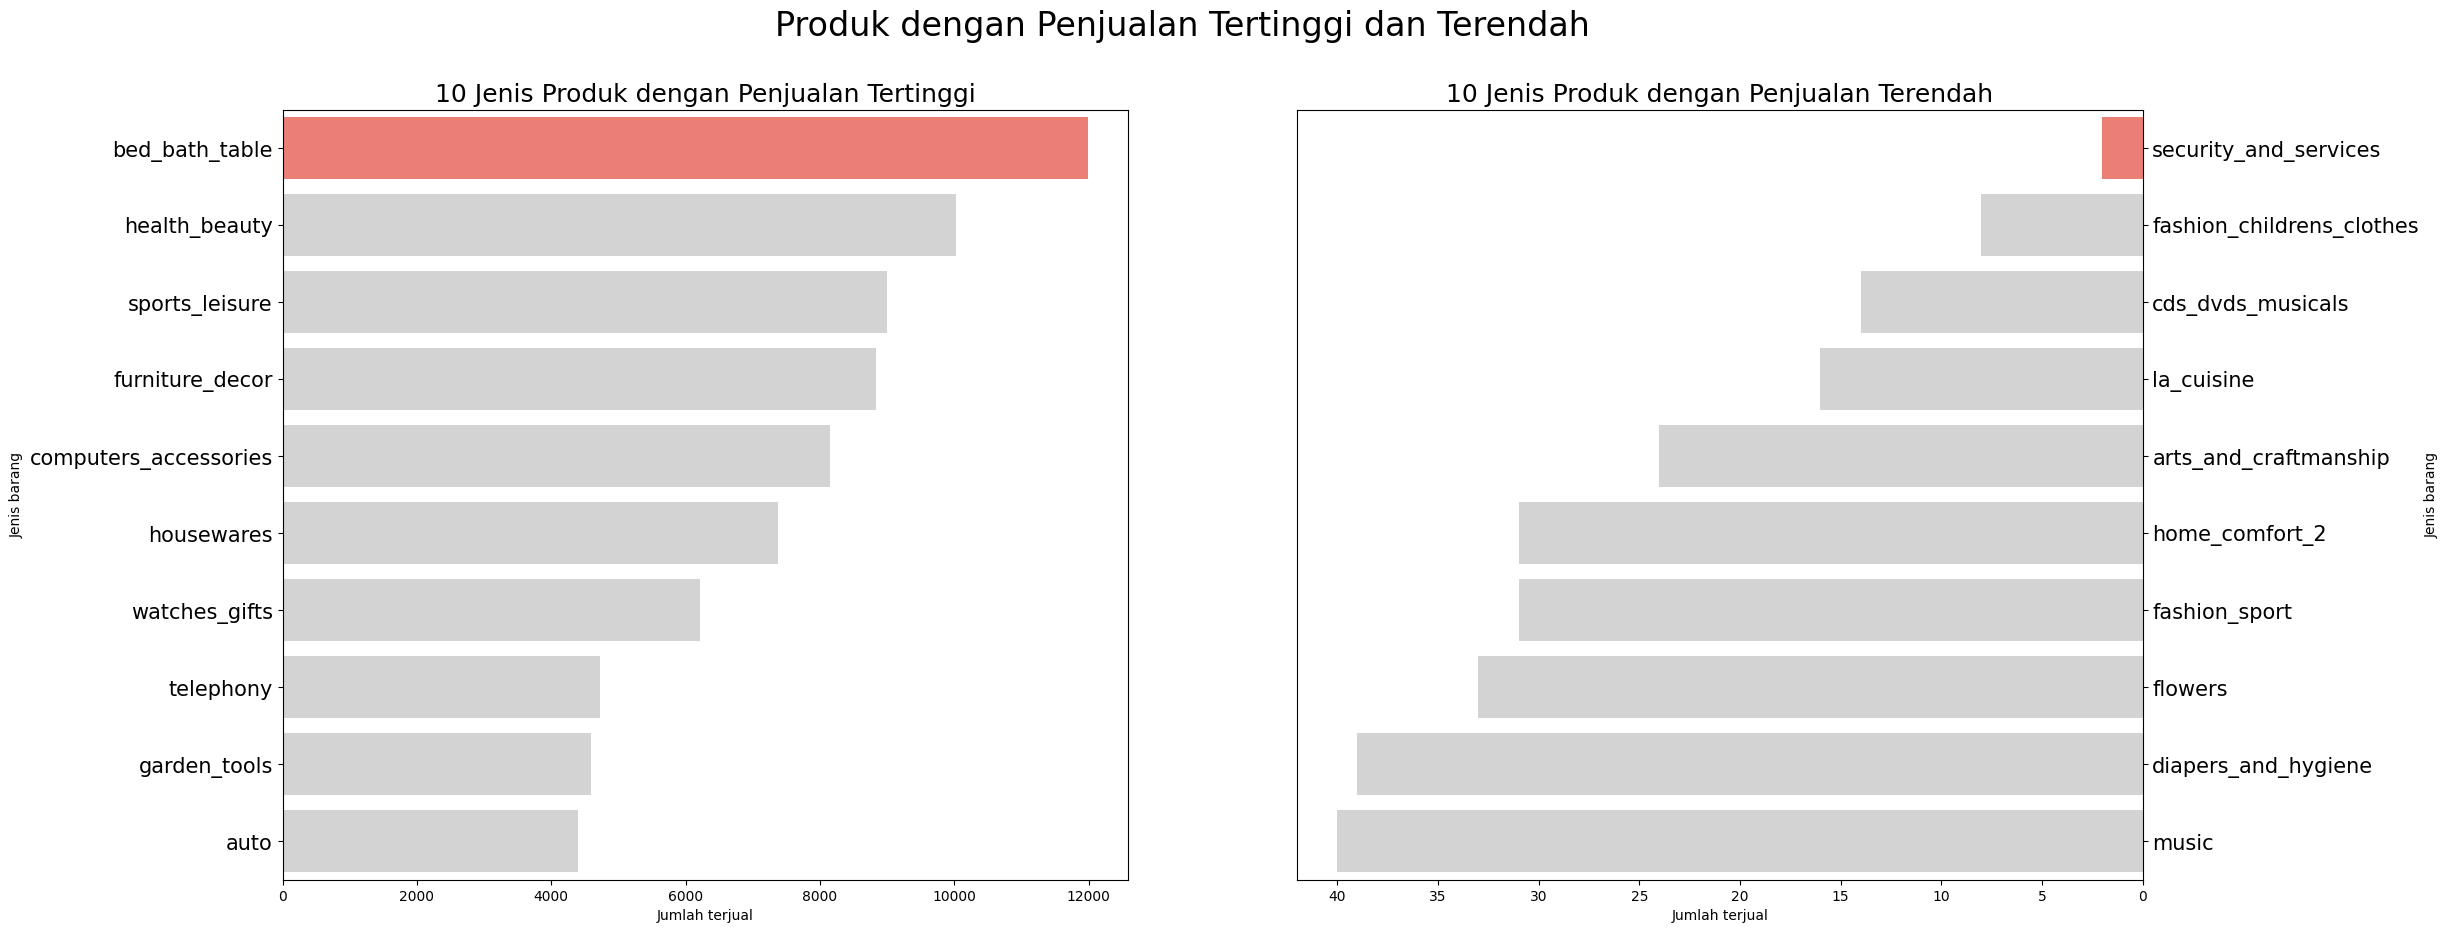

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# Warna yang diubah sesuai preferensi
colors = ["#FF6F61", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]

# Barplot untuk produk dengan penjualan tertinggi
sb.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel("Jenis barang")
ax[0].set_xlabel("Jumlah terjual")
ax[0].set_title("10 Jenis Produk dengan Penjualan Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

# Barplot untuk produk dengan penjualan terendah
sb.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel("Jenis barang")
ax[1].set_xlabel("Jumlah terjual")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("10 Jenis Produk dengan Penjualan Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk dengan Penjualan Tertinggi dan Terendah", fontsize=24)
plt.show()

Setelah dieksplor dan divisualisasikan, produk yang populer sepanjang tahun 2016-2018 adalah produk bed bath n table yang kemungkinan produk furnitur kenyamanan rumah, diikuti produk kecantikan, lalu peralatan olahraga, komputer, dan peralatan rumah tangga lainnya.

Jika dilihat dari produk yang paling sedikit penjualannya, adalah produk keamanan, baju dan fashion anak, kaset musik, makanan, produk seni dan prakarya, dan produk lainnya yang terkesan berfungsi sebagai estetika dan hobi saja.

Artinya e-commerce ini sebenarnya menjual berbagai macam kategori barang, namun yang paling diminati adalah produk treatments dan wearables.

#### Total Belanja Pelanggan Tiap Bulan

In [ ]:
# Menggunakan resample untuk mengelompokkan data berdasarkan bulan ("M") pada kolom "order_approved_at"
sum_spend_df = rfmNall_df.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
})

# Mengembalikan indeks resample menjadi kolom agar dapat diakses lebih mudah
sum_spend_df = sum_spend_df.reset_index()

# Mengganti nama kolom "price" menjadi "total_spend"
sum_spend_df.rename(columns={
            "price": "total_spend"
        }, inplace=True)

# Menampilkan DataFrame hasil aggregasi
sum_spend_df

,order_approved_at,total_spend
0,2016-09-30,134.97
1,2016-10-31,51201.31
2,2016-11-30,0.00
3,2016-12-31,10.90
4,2017-01-31,124313.26
5,2017-02-28,262281.82
6,2017-03-31,394384.70
7,2017-04-30,390306.86
8,2017-05-31,550323.59
9,2017-06-30,461045.05


In [ ]:
sum_spend_df_MY = sum_spend_df
# Mengganti format kolom 'order_approved_at'
sum_spend_df_MY['order_approved_at'] = sum_spend_df_MY['order_approved_at'].dt.strftime('%b , %y')

# Menampilkan data frame setelah perubahan
sum_spend_df_MY

,order_approved_at,total_spend
0,"Sep , 16",134.97
1,"Oct , 16",51201.31
2,"Nov , 16",0.00
3,"Dec , 16",10.90
4,"Jan , 17",124313.26
5,"Feb , 17",262281.82
6,"Mar , 17",394384.70
7,"Apr , 17",390306.86
8,"May , 17",550323.59
9,"Jun , 17",461045.05


Menampilkan data belanja pelanggan terbanyak

In [ ]:
sum_spend_df_MY = sum_spend_df_MY.sort_values('total_spend').drop_duplicates('order_approved_at')
sum_spend_df_MY

,order_approved_at,total_spend
2,"Nov , 16",0.00
3,"Dec , 16",10.90
0,"Sep , 16",134.97
24,"Sep , 18",145.00
1,"Oct , 16",51201.31
4,"Jan , 17",124313.26
5,"Feb , 17",262281.82
7,"Apr , 17",390306.86
6,"Mar , 17",394384.70
9,"Jun , 17",461045.05


In [ ]:
# Membuat kolom kategori berdasarkan urutan kustom
sum_spend_df['month_cat'] = pd.Categorical(sum_spend_df['order_approved_at'], categories=['order_approved_at'])

# Mengurutkan DataFrame berdasarkan kolom kategori
sorted_df = sum_spend_df.sort_values(by='month_cat')

# Menghapus kolom 'month_cat' jika tidak diperlukan
sorted_df = sorted_df.drop(columns=['month_cat'])

sorted_df

,order_approved_at,total_spend
0,"Sep , 16",134.97
1,"Oct , 16",51201.31
2,"Nov , 16",0.00
3,"Dec , 16",10.90
4,"Jan , 17",124313.26
5,"Feb , 17",262281.82
6,"Mar , 17",394384.70
7,"Apr , 17",390306.86
8,"May , 17",550323.59
9,"Jun , 17",461045.05


Visualisasi Total Belanja Pelanggan Tiap Bulan Periode 2016-2018

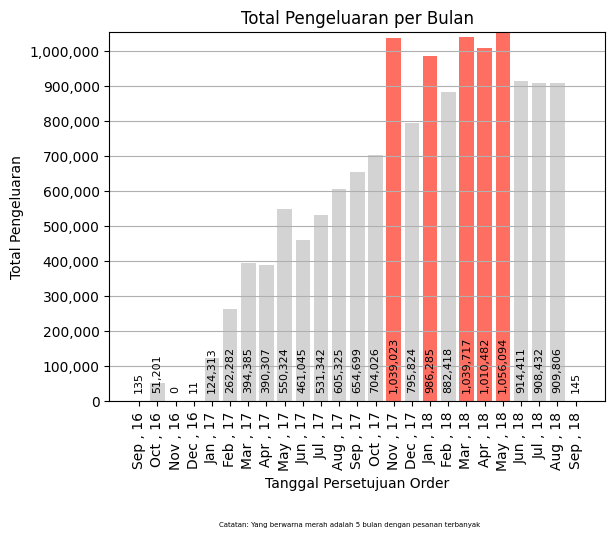

In [ ]:
# Mendapatkan indeks lima nilai tertinggi
top5_indices = sum_spend_df['total_spend'].nlargest(5).index

# Menggunakan warna berbeda untuk lima nilai tertinggi
colors = ['#FF6F61' if i in top5_indices else '#D3D3D3' for i in range(len(sum_spend_df))]

# Membuat plot batang
bars = plt.bar(x=sum_spend_df['order_approved_at'], height=sum_spend_df['total_spend'], color=colors)

# Menambahkan angka detil ke masing-masing bar
for bar, value in zip(bars, sum_spend_df['total_spend']):
    plt.text(bar.get_x() + bar.get_width() / 2, 30000, '{:,.0f}'.format(value), ha='center', color='black', fontsize=8, rotation=90)

# Mengatur label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=90)

# Mengubah nilai total_spend menjadi format integer
sum_spend_df['total_spend'] = sum_spend_df['total_spend'].astype(int)

# Mengatur limit y axis dengan nilai maksimum dari total_spend
plt.ylim(top=sum_spend_df['total_spend'].max())

# Menambahkan label pada sumbu y dengan format string
plt.yticks(np.arange(0, sum_spend_df['total_spend'].max(), step=100000), ['{:,.0f}'.format(x) for x in np.arange(0, sum_spend_df['total_spend'].max(), step=100000)])

# Menambahkan judul, label sumbu, dan grid
plt.title('Total Pengeluaran per Bulan')
plt.text(0.5, -0.15, 'Catatan: Yang berwarna merah adalah 5 bulan dengan pesanan terbanyak', transform=plt.gcf().transFigure, fontsize=5, ha='center')
plt.xlabel('Tanggal Persetujuan Order')
plt.ylabel('Total Pengeluaran')
plt.grid(axis='y')

# Menampilkan plot
plt.show()


Setelah divisualisasikan, terlihat bahwa pengeluaran pelanggan tiap bulannya bervariasi (jika dilihat dari perspektif lain ini juga merupakan pembelian atau pemasukan untuk E-commerce), puncak dari pengeluaran pelanggan tertinggi adalah pada bulan november 2017, januari 2018, maret 2018, april 2018, dan mei 2018.

#### Jumlah Pembelian Tiap bulan

In [ ]:
# Menggunakan metode resample untuk mengelompokkan data berdasarkan bulan
# dan menggunakan agg untuk melakukan agregasi data dengan menghitung ukuran setiap kelompok
buy_df = rfmNall_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})

# Mengembalikan indeks resample menjadi kolom agar dapat diakses lebih mudah
buy_df = buy_df.reset_index()

# Mengganti nama kolom "price" menjadi "total_spend"
buy_df.rename(columns={
            "order_id": "total_buy"
        }, inplace=True)

# Menampilkan DataFrame hasil pengelompokan dan agregasi
buy_df

,order_approved_at,total_buy
0,2016-09-30,3
1,2016-10-31,398
2,2016-11-30,0
3,2016-12-31,1
4,2017-01-31,984
5,2017-02-28,2104
6,2017-03-31,3263
7,2017-04-30,2845
8,2017-05-31,4471
9,2017-06-30,3863


In [ ]:
buy_df_MY = buy_df
# Mengubah format indeks DataFrame menjadi Tahun-Bulan
buy_df_MY['order_approved_at']= buy_df_MY['order_approved_at'].dt.strftime('%b , %y')

# Menampilkan DataFrame hasil perubahan format indeks dan perubahan nama kolom
buy_df_MY

,order_approved_at,total_buy
0,"Sep , 16",3
1,"Oct , 16",398
2,"Nov , 16",0
3,"Dec , 16",1
4,"Jan , 17",984
5,"Feb , 17",2104
6,"Mar , 17",3263
7,"Apr , 17",2845
8,"May , 17",4471
9,"Jun , 17",3863


Mengurutkan data berdasarkan total pembelian bulanan

In [ ]:
buy_df_MY = buy_df_MY.sort_values('total_buy').drop_duplicates('order_approved_at')
buy_df_MY

,order_approved_at,total_buy
2,"Nov , 16",0
24,"Sep , 18",1
3,"Dec , 16",1
0,"Sep , 16",3
1,"Oct , 16",398
4,"Jan , 17",984
5,"Feb , 17",2104
7,"Apr , 17",2845
6,"Mar , 17",3263
9,"Jun , 17",3863


In [ ]:
# Membuat kolom kategori berdasarkan urutan kustom
buy_df['month_buy'] = pd.Categorical(buy_df['order_approved_at'], categories=['order_approved_at'])

# Mengurutkan DataFrame berdasarkan kolom kategori
sorted_buy_df = buy_df.sort_values(by='month_buy')

# Menghapus kolom 'month_cat' jika tidak diperlukan
sorted_buy_df = buy_df.drop(columns=['month_buy'])

sorted_buy_df

,order_approved_at,total_buy
0,"Sep , 16",3
1,"Oct , 16",398
2,"Nov , 16",0
3,"Dec , 16",1
4,"Jan , 17",984
5,"Feb , 17",2104
6,"Mar , 17",3263
7,"Apr , 17",2845
8,"May , 17",4471
9,"Jun , 17",3863


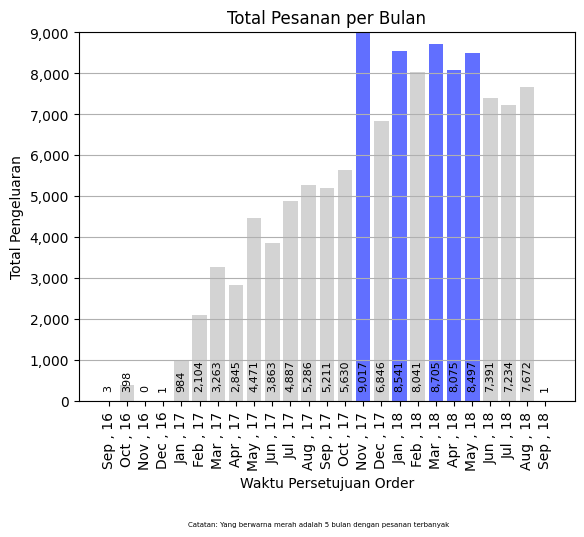

In [ ]:
# Mendapatkan indeks nilai tertinggi
max_index = buy_df['total_buy'].nlargest(5).index

# Menggunakan warna berbeda untuk lima nilai tertinggi
colors = ['#616FFF' if i in max_index else '#D3D3D3' for i in range(len(buy_df))]

# Membuat plot batang
bars = plt.bar(x=buy_df['order_approved_at'], height=buy_df['total_buy'], color=colors)

# Menambahkan angka detil ke masing-masing bar
for bar, value in zip(bars, buy_df['total_buy']):
    plt.text(bar.get_x() + bar.get_width() / 2, 300, '{:,.0f}'.format(value), ha='center', color='black', fontsize=8, rotation=90)

# Mengatur label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=90)

# Mengubah nilai total_buy menjadi format integer
buy_df['total_buy'] = buy_df['total_buy'].astype(int)

# Mengatur limit y axis dengan nilai maksimum dari total_buy
plt.ylim(top=buy_df['total_buy'].max())

# Menambahkan label pada sumbu y dengan format string
plt.yticks(np.arange(0, buy_df['total_buy'].max(), step=1000), ['{:,.0f}'.format(x) for x in np.arange(0, buy_df['total_buy'].max(), step=1000)])

# Menambahkan judul, label sumbu, dan grid
plt.title('Total Pesanan per Bulan')
# Menambahkan catatan
plt.text(0.5, -0.15, 'Catatan: Yang berwarna merah adalah 5 bulan dengan pesanan terbanyak', transform=plt.gcf().transFigure, fontsize=5, ha='center')
plt.xlabel('Waktu Persetujuan Order')
plt.ylabel('Total Pengeluaran')
plt.grid(axis='y')

# Menampilkan plot
plt.show()


Jika dilihat dari diagram tersebut, terdapat pola yang sama dengan diagram pengeluaran pengguna perbulan sebelumnya, yaitu adanya peningkatan total pesanan perbulan di bulan yang sama dengan diagram sebelumnya, yaitu pada bulan november 2017, januari 2018, maret 2018, april 2018, dan mei 2018.

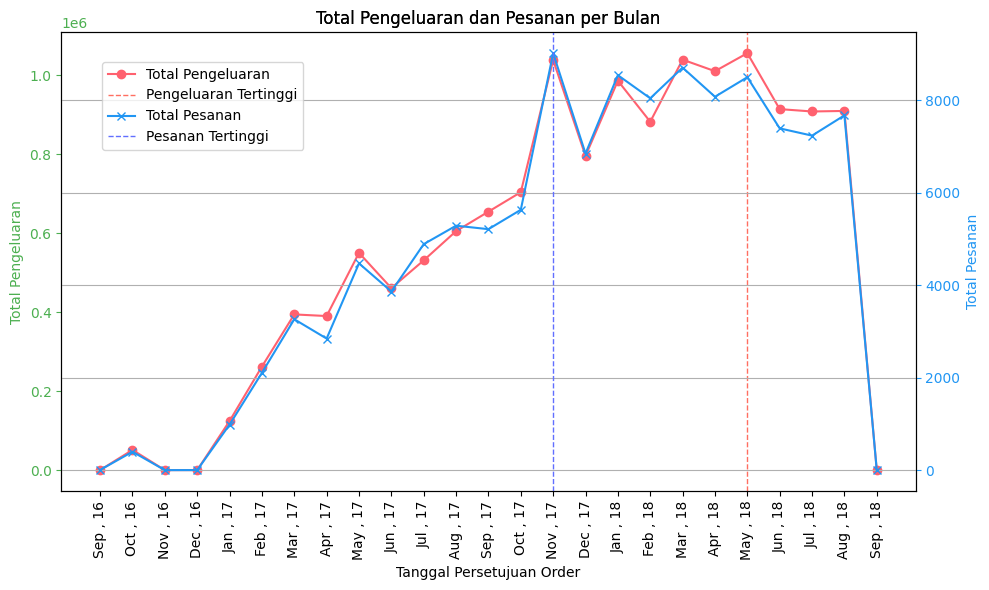

In [ ]:
# Plot untuk total_spend_df
fig, ax1 = plt.subplots(figsize=(10, 6))

# Mendapatkan indeks lima nilai tertinggi
top5_indices_spend = sum_spend_df['total_spend'].nlargest(5).index

# Menggunakan warna berbeda untuk lima nilai tertinggi
colors_spend = ['#FF6F61' if i in top5_indices_spend else '#D3D3D3' for i in range(len(sum_spend_df))]

# Membuat plot garis
ax1.plot(sum_spend_df['order_approved_at'], sum_spend_df['total_spend'], color='#FF616F', marker='o', label='Total Pengeluaran')

# Menambahkan label dan judul sumbu
ax1.set_xlabel('Tanggal Persetujuan Order')
ax1.set_ylabel('Total Pengeluaran', color='#4CAF50')
ax1.tick_params('y', colors='#4CAF50')
ax1.set_title('Total Pengeluaran dan Pesanan per Bulan')


# Menambahkan garis referensi untuk lima nilai tertinggi
ax1.axvline(x=sum_spend_df['order_approved_at'][top5_indices_spend[0]], color='#FF6F61', linestyle='--', linewidth=1, label='Pengeluaran Tertinggi')

# Plot untuk total_buy_df
ax2 = ax1.twinx()

# Mendapatkan indeks nilai tertinggi
max_index_buy = buy_df['total_buy'].nlargest(5).index

# Menggunakan warna berbeda untuk lima nilai tertinggi
colors_buy = ['#616FFF' if i in max_index_buy else '#D3D3D3' for i in range(len(buy_df))]

# Membuat plot garis
ax2.plot(buy_df['order_approved_at'], buy_df['total_buy'], color='#2196F3', marker='x', label='Total Pesanan')

# Menambahkan label dan judul sumbu
ax2.set_ylabel('Total Pesanan', color='#2196F3')
ax2.tick_params('y', colors='#2196F3')

# Menambahkan garis referensi untuk lima nilai tertinggi
ax2.axvline(x=buy_df['order_approved_at'][max_index_buy[0]], color='#616FFF', linestyle='--', linewidth=1, label='Pesanan Tertinggi')

# Menambahkan legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Menampilkan plot
ax1.tick_params(axis='x', rotation=90)  # Rotasi label sumbu x di ax1
plt.title('Total Pengeluaran dan Pesanan per Bulan')
plt.grid(True)
plt.tight_layout()
plt.show()


Hal ini menekankan bahwa pada dua diagram sebelumnya terdapat korelasi positif antara pesanan dan pembelian (ya bisa aja kan pesanannya banyak tapi harganya pada murah semua sehingga ga sesuai ekspektasi), Adapun sedikit perbedaan yang ada pada kedua diagram tersebut adalah pada puncak maksimalnya, dimana pengeluaran pengguna maksimal berada pada bulan mei 2018, dan pesanan pada bulan november 2017.

#### Kategori Produk Paling Populer dan Paling Sedikit Dibeli Tiap Bulannya

In [ ]:
# Menggunakan metode resample untuk mengelompokkan data berdasarkan bulan
# dan menggunakan agg untuk melakukan agregasi data dengan menghitung ukuran setiap kelompok
popular_df = rfmNall_df.resample(rule='M', on='order_approved_at').agg({
    'product_id': 'size'
}).reset_index()

# Menggunakan groupby dan agg untuk menjumlahkan jumlah product_id untuk setiap kategori
result_table = rfmNall_df.groupby(['order_approved_at', 'product_category_name_english']).agg({
    'product_id': 'size'
}).reset_index()

# Mengganti nama kolom "product_id" menjadi "jumlah_product_id" di result_table
result_table.rename(columns={'product_id': 'jumlah_product_id'}, inplace=True)

# Membuat DataFrame contoh
# Misalnya, Anda memiliki DataFrame df dengan kolom 'order_approved_at', 'product_id', dan 'product_category_name_english'
# Anda dapat menyesuaikan dengan struktur DataFrame yang sebenarnya
data = {
    'order_approved_at': pd.to_datetime(result_table['order_approved_at']),
    'product_id': result_table['jumlah_product_id'],
    'product_category_name_english': result_table['product_category_name_english']
}

df = pd.DataFrame(data)

# Menghitung total product_id per kategori untuk setiap bulan
result_table = df.groupby(['product_category_name_english', pd.Grouper(key='order_approved_at', freq='M')]).agg({
    'product_id': 'sum'
}).reset_index()

# Assuming you have 'result_table' DataFrame
result_table['order_approved_at'] = pd.to_datetime(result_table['order_approved_at'])

# Grouping by 'product_category_name_english' and monthly frequency on 'order_approved_at'
result_categorized = result_table.groupby(['product_category_name_english', pd.Grouper(key='order_approved_at', freq='M')]).agg({
    'product_id': 'sum'
}).reset_index()

# Sorting the DataFrame based on 'order_approved_at'
result_categorized = result_categorized.sort_values(by='order_approved_at')

# Assuming you have 'result_table' DataFrame
result_table['order_approved_at'] = pd.to_datetime(result_table['order_approved_at'])

# Grouping by 'product_category_name_english' and monthly frequency on 'order_approved_at'
result_categorized = result_table.groupby(['product_category_name_english', pd.Grouper(key='order_approved_at', freq='M')]).agg({
    'product_id': 'sum'
}).reset_index()

# Sorting the DataFrame based on 'order_approved_at'
result_categorized = result_categorized.sort_values(by='order_approved_at')

# Displaying only the top product in each month
top_products = result_categorized.groupby('order_approved_at').apply(lambda x: x.nlargest(1, 'product_id')).reset_index(drop=True)

top_products

,product_category_name_english,order_approved_at,product_id
0,health_beauty,2016-09-30,3
1,furniture_decor,2016-10-31,81
2,fashion_bags_accessories,2016-12-31,1
3,furniture_decor,2017-01-31,204
4,furniture_decor,2017-02-28,270
5,furniture_decor,2017-03-31,358
6,bed_bath_table,2017-04-30,304
7,bed_bath_table,2017-05-31,437
8,bed_bath_table,2017-06-30,436
9,bed_bath_table,2017-07-31,638


In [ ]:
top_products['order_approved_at']= top_products['order_approved_at'].dt.strftime('%b , %y')

# Menampilkan DataFrame hasil perubahan format indeks dan perubahan nama kolom
top_products

,product_category_name_english,order_approved_at,product_id
0,health_beauty,"Sep , 16",3
1,furniture_decor,"Oct , 16",81
2,fashion_bags_accessories,"Dec , 16",1
3,furniture_decor,"Jan , 17",204
4,furniture_decor,"Feb , 17",270
5,furniture_decor,"Mar , 17",358
6,bed_bath_table,"Apr , 17",304
7,bed_bath_table,"May , 17",437
8,bed_bath_table,"Jun , 17",436
9,bed_bath_table,"Jul , 17",638


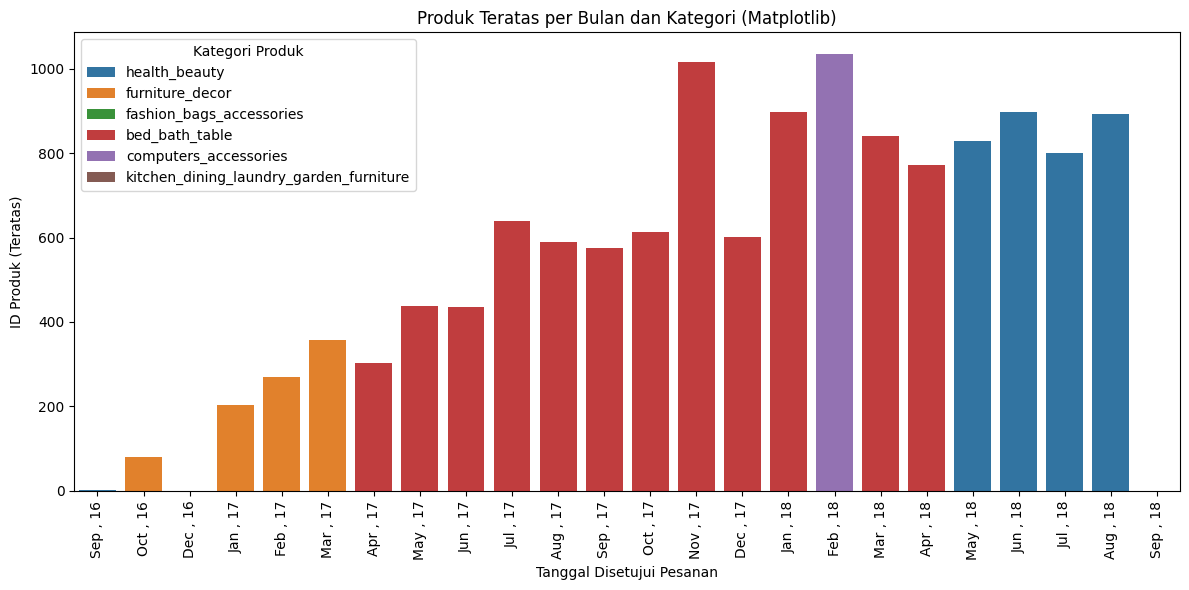

In [ ]:
# Buat diagram batang
plt.figure(figsize=(12, 6))
sb.barplot(
    x='order_approved_at',
    y='product_id',
    hue='product_category_name_english',
    data=top_products
)

# Putar label sumbu x untuk keterbacaan yang lebih baik
plt.xticks(rotation=90)
plt.title('Produk Teratas per Bulan dan Kategori')
plt.xlabel('Tanggal Disetujui Pesanan')
plt.ylabel('ID Produk (Teratas)')
plt.legend(title='Kategori Produk')
plt.tight_layout()
plt.show()


Diagram diatas menunjukkan bahwa popularitas kategori produk juga mengalami fluktuasi di tiap bulannya.

### **Pertanyaan 2** : Dalam kurun waktu 2016-2018, di state dan di kota manakah yang terdapat konsentrasi pelanggan tertinggi? Bagaimana segmentasi kita lakukan pada pelanggan yang ada di dalam e-commerce ini jika dikelompokkan dari kebiasaan **(RFM)** mereka?

#### Lokasi Pengguna

Untuk melakukan ini, kita perlu menggunakan data yang sudah tidak memiliki duplikat yaitu all_df_data. Atau alternatif lainnya membuat dataframe baru dari file dataframe asli.

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimate

In [ ]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [ ]:
# Mengasumsikan df_geolocation adalah DataFrame Anda

# Menghitung jumlah geolocation_state yang unik untuk setiap geolocation_zip_code_prefix
other_state_geolocation = df_geolocation.groupby('geolocation_zip_code_prefix')['geolocation_state'].nunique().reset_index(name='count')

# Memfilter baris di mana jumlah geolocation_state lebih besar atau sama dengan 2
result = other_state_geolocation[other_state_geolocation['count'] >= 2].shape

# Mengelompokkan berdasarkan geolocation_zip_code_prefix dan geolocation_state, mendapatkan jumlah, menghapus duplikat, dan menjaga kemunculan pertama
max_state = df_geolocation.groupby(['geolocation_zip_code_prefix', 'geolocation_state']).size().reset_index(name='count').drop_duplicates(subset='geolocation_zip_code_prefix').drop('count', axis=1)


In [ ]:
# Mengelompokkan data berdasarkan kombinasi geolocation_zip_code_prefix, geolocation_city, dan geolocation_state.
# Kemudian, diambil nilai median dari geolocation_lat dan geolocation_lng untuk setiap kelompok.
geolocation_loc = df_geolocation.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# Menggabungkan DataFrame geolocation_loc dengan DataFrame max_state berdasarkan geolocation_zip_code_prefix dan geolocation_state.
# Jenis penggabungan yang digunakan adalah 'inner'.
geolocation_loc = geolocation_loc.merge(max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')


In [ ]:
customers_loc = customers_df.merge(geolocation_loc,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

Melihat data hasil merge

In [ ]:
customers_loc

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,4.0,Untitled,No Comment,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502307,-47.396740
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,...,5.0,super recomendo,No Comment,2018-06-22,2018-06-26 19:17:40,14409,franca,SP,-20.502307,-47.396740
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,...,5.0,Untitled,No Comment,2017-09-19,2017-09-20 03:47:39,14409,franca,SP,-20.502307,-47.396740
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,...,5.0,Untitled,No Comment,2018-03-29,2018-04-11 20:07:14,14409,franca,SP,-20.502307,-47.396740
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,...,5.0,Untitled,No Comment,2018-08-04,2018-08-04 23:20:25,14409,franca,SP,-20.502307,-47.396740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156083,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,82a11e82ea02c7e3381366e935c1126e,delivered,2018-05-23 09:07:46,2018-05-25 02:54:54,2018-05-25 12:11:00,...,5.0,Untitled,No Comment,2018-06-07,2018-06-11 17:00:28,98860,eugenio de castro,RS,-28.526971,-54.145383
156084,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,6e9f8d6156d8c37f0e0e6351908de639,delivered,2018-03-28 12:28:04,2018-03-28 12:47:35,2018-03-29 19:19:06,...,5.0,Untitled,Muito bom,2018-04-11,2018-04-11 17:21:07,5538,sao paulo,SP,-23.588504,-46.737870
156085,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,...,5.0,Untitled,No Comment,2018-02-21,2018-02-21 10:43:09,74980,aparecida de goiania,GO,-16.822945,-49.245116
156086,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,...,5.0,Untitled,No Comment,2018-02-21,2018-02-21 10:43:09,74980,aparecida de goiânia,GO,-16.823261,-49.247368


In [ ]:
customers_loc = customers_loc.drop_duplicates('order_id')

Diagram yang menyatakan banyaknya pelanggan berdasarkan state

In [ ]:
# Create DataFrame showing state and customer count
customers_state = (
    customers_loc.groupby('customer_state')
    .agg(customers_location=('customer_unique_id', 'count'))
    .sort_values(by='customers_location', ascending=False)
    .reset_index()
    .rename(columns={'customers_location': 'customers_each_state'})
)

customers_state

,customer_state,customers_each_state
0,SP,41731
1,RJ,12839
2,MG,11624
3,RS,5462
4,PR,5034
5,SC,3637
6,BA,3371
7,ES,2027
8,GO,2011
9,DF,1969


Membuat diagram banyaknya pengguna dalam tiap state

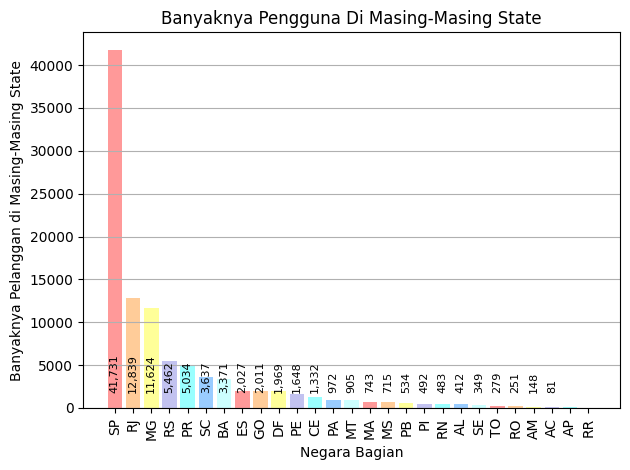

In [ ]:
# Data to plot
labels = customers_state['customer_state']
sizes = customers_state['customers_each_state']
colors = ['#ff9999', '#ffcc99', '#ffff99', '#c2c2f0', '#99ffff', '#99ccff', '#ccffff']  # Mengambil warna sesuai jumlah bar

# Plot as a bar chart
plt.bar(labels, sizes, color=colors)

# Menambahkan angka detil ke masing-masing bar
for bar, value in zip(bars, customers_state['customers_each_state']):
    plt.text(bar.get_x() + bar.get_width() / 2, 2000, '{:,.0f}'.format(value), ha='center', color='black', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Negara Bagian')
plt.ylabel('Banyaknya Pelanggan di Masing-Masing State')
plt.title('Distribusi Pelanggan Melalui Segmen')


# Menampilkan plot
plt.xticks(rotation=90)
plt.title('Banyaknya Pengguna Di Masing-Masing State')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Diagram yang menyatakan banyaknya pelanggan di setiap kota

Jika melihat pengguna di masing-masing state, sudah bisa ditebah bahwasanya pengguna sebagian berasal dari negara bagian yang sudah maju, berkembang, dan cukup besar sehingga penggunanya juga banyak. Contohnya pada diagram terlihat SP adalah yang paling besar, ini adalah negara bagian sao paulo yang merupakan negara bagian paling berkembang secara ekonomi dan industri, diikuti rio de janeiro, dan negara-negara bagian lainnya.

In [ ]:
# Create DataFrame showing state and customer count
customers_city = (
    customers_loc.groupby('customer_city')
    .agg(customers_location=('customer_unique_id', 'count'))
    .sort_values(by='customers_location', ascending=False)
    .reset_index()
    .rename(columns={'customers_location': 'customers_each_city'})
)

customers_city

,customer_city,customers_each_city
0,sao paulo,15538
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,1960
4,curitiba,1521
...,...,...
4069,santa barbara do para,1
4070,centralina,1
4071,centro novo do maranhao,1
4072,cerejeiras,1


Membuat diagram yang menampilkan banyaknya pelanggan di tiap kota

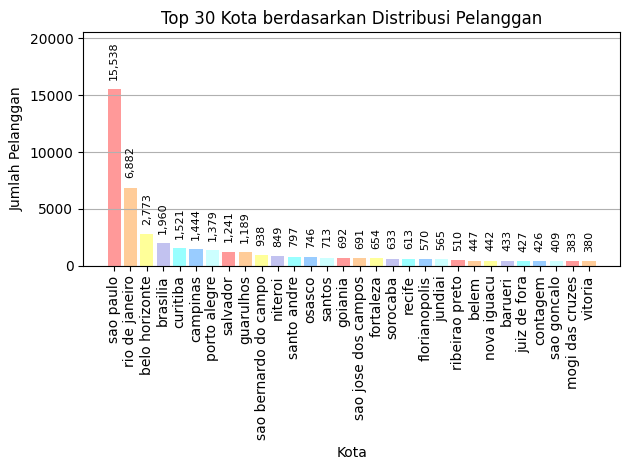

In [ ]:
# Mengasumsikan Anda memiliki DataFrame 'customers_city' dengan kolom 'customer_city' dan 'customers_each_city'

# Mengurutkan data berdasarkan jumlah pelanggan secara menurun (top 30)
customers_city_top30 = customers_city.sort_values(by='customers_each_city', ascending=False).head(30)

# Mengekstrak data untuk plotting
labels = customers_city_top30['customer_city'].to_numpy()
sizes = customers_city_top30['customers_each_city'].to_numpy()
colors = ['#ff9999', '#ffcc99', '#ffff99', '#c2c2f0', '#99ffff', '#99ccff', '#ccffff'][:len(customers_city_top30)]  # Mengambil warna sesuai jumlah bar

# Membuat bar chart
plt.bar(labels, sizes, color=colors)

# Menambahkan detail pada setiap bar
for bar, value in zip(plt.bar(labels, sizes, color=colors), customers_city_top30['customers_each_city']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 1000, '{:,.0f}'.format(value), ha='center', color='black', fontsize=8, rotation=90)

# Label dan judul
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.title('Top 30 Kota berdasarkan Distribusi Pelanggan')

# Menyesuaikan plot
plt.xticks(rotation=90)
plt.grid(axis='y')

# Menambahkan batas atas pada sumbu y
plt.ylim(0, max(sizes) + 5000)

plt.tight_layout()
plt.show()


Serupa dengan negara bagian, pada kota tempat tinggal pengguna juga memiliki pendekatan distribusi yang sama yaitu bergantung pada seberapa maju dan seberapa besar pertumbuhan ekonomi di kota tersebut. Dapat dilihat jajaran kota besar seperti sao paulo, rio de janeiro, dan brasilia yang sudah sering kita dengar sebelumnya, merupakan kota-kota dengan perkembangan paling pesat.

Membuat plot map

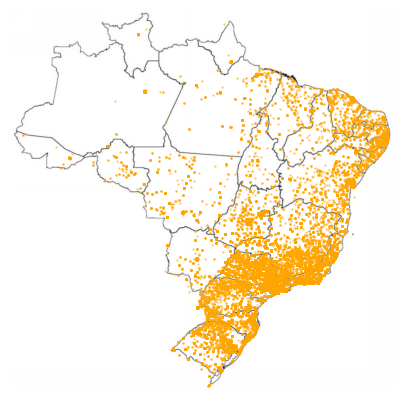

In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(5,5), alpha=0.5,s=0.5,c='orange')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])

plot_brazil_map(customers_loc.drop_duplicates(subset='customer_unique_id'))

Jika dilihat berdasarkan geoloacation scatter plot, benar bahwa sebagian besar pelanggan berasal dari kota dan negara bagian besar yang berada di timur dan selatan brazil.

**FYI** area utara dan barat brazil dipenuhi hutan, dan yang paling barat itu adalah amazonas, sesuai namanya, itu tempat dimana hutan amazon berada.

Waffle plot diatas menunjukkan pengelompokan pengguna berdasarkan ranknya, rank ini dinilai berdasarkan total skor rfm yang dimiliki pengguna. Hasilnya menunjukkan kalau sebagian besar pengguna adalah pengguna rank c, diikuti rank b, d, a dan terakhir (yang paling kecil) adalah pengguna ranking s.

#### Recency

<ipython-input-194-6e50e7cdd255>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm_df['recency'], color='Green')


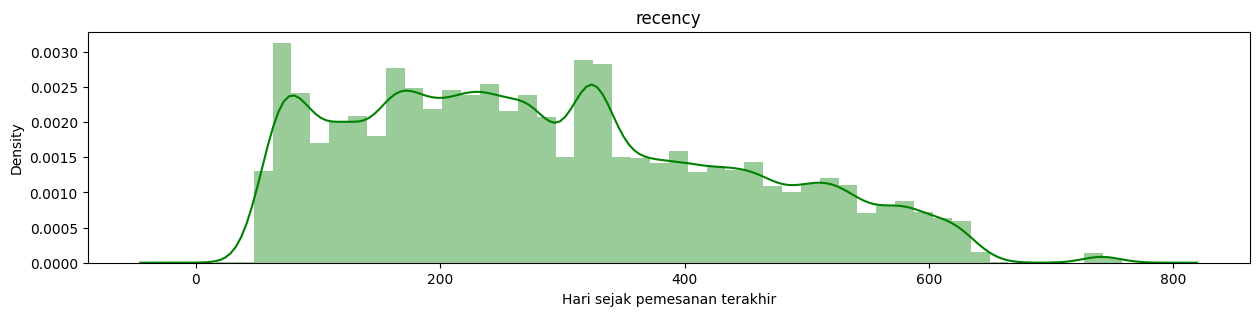

In [ ]:
plt.figure(figsize=(15, 3))
sb.distplot(rfm_df['recency'], color='Green')

plt.xlabel('Hari sejak pemesanan terakhir')
plt.title('recency');

Resensi diatas menunjukkan bahwa di e commerce ini, ada banyak sekali kebiasaan dari para pelanggan, jika membicarakan resensi, pelanggan masih cukup banyak terkategori aktif (karena pengguna yang terakhir menggunakan jasa e-commerce ini paling padat pada kurun waktu 0-300 hari terakhir, yang mana kurang dari 1 tahun.

#### Frequency

<ipython-input-195-d954a2701897>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm_df['frequency'], color='red')


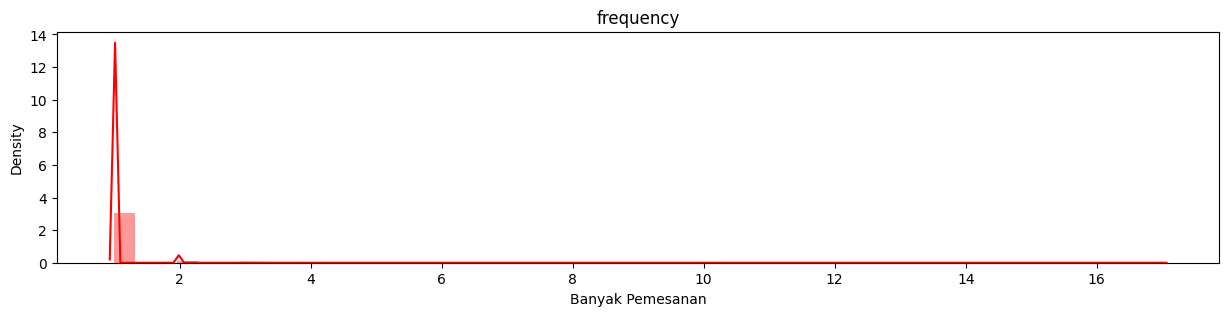

In [ ]:
plt.figure(figsize=(15, 3))

# Ganti warna menjadi 'red'
sb.distplot(rfm_df['frequency'], color='red')

plt.xlabel('Banyak Pemesanan')
plt.title('frequency')

plt.show()

Ada yang aneh dari diagram ini, banyak pelanggan hanya melakukan satu pesanan. Seperti yang disinggung dalam "Analisis Tren Bisnis Olist" awal, kesalahan umum yang mungkin terjadi adalah dengan hanya menggunakan jumlah order_id saat mengelompokkan berdasarkan customer_unique_id. Hal ini disebabkan oleh:

Kuantitas dalam tabel pesanan asli dihasilkan berdasarkan jumlah baris (misalnya, kuantitas pesanan = 4 berarti ada 4 baris data).
Adanya dua SKU (produk) berarti terdapat dua baris terpisah dalam tabel data.
Sebagai contoh, jika kita mengelompokkan pengguna "X" yang memiliki pesanan dengan produk "A" sebanyak 2 dan produk "B" sebanyak 1, maka jumlah pengelompokan akan menjadi 3 untuk pelanggan ini, padahal sebenarnya hanya satu pesanan yang ditempatkan.

Jadi, mengandalkan pengelompokan berdasarkan order_id saja tidak mencerminkan jumlah pesanan yang akurat, karena setiap produk dalam satu pesanan memiliki entri baris tersendiri dalam tabel data. Oleh karena itu, diperlukan pertimbangan kuantitas produk dalam menganalisis jumlah pesanan pelanggan.

#### Monetary

<ipython-input-196-4e6825f3af60>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(rfm_df['monetary'], color='Blue')


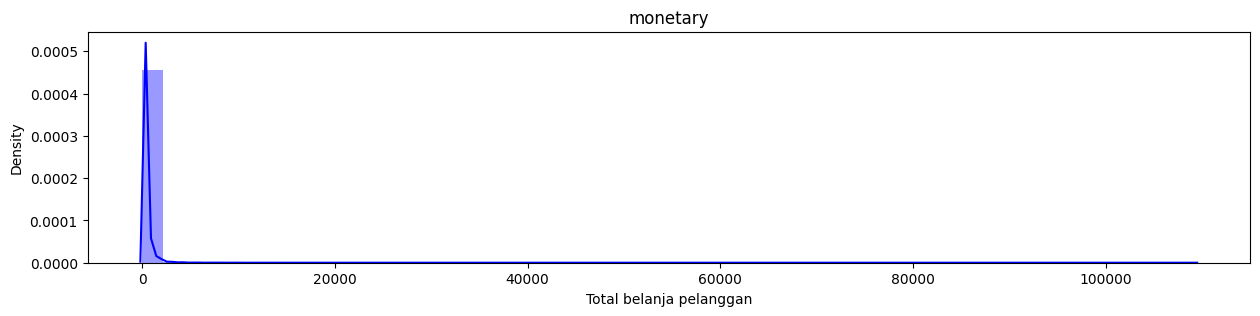

In [ ]:
plt.figure(figsize=(15, 3))

# Ganti warna menjadi 'Blue'
sb.distplot(rfm_df['monetary'], color='Blue')

plt.xlabel('Total belanja pelanggan')
plt.title('monetary')

plt.show()

Menurut diagram monetary ini, pengguna kebanyakan adalah orang yang melakukan belanja dengan pengeluaran yang tergolong kecil, dimana pengguna kebanyakan terkonsentrasi di area dengan total belanja pelanggan kurang dari 5000 Real Brazil, bukan berarti tidak ada pelanggan yang belanja lebih banyak, karena jika diperhatikan terdapat kurva landai yang tidak bisa dilihat jelas karena kepadatannya benar-benar rendah.

#### Segmentasi Pelanggan

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96096 entries, 0 to 96095
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96096 non-null  object        
 1   order_purchase_timestamp  96096 non-null  datetime64[ns]
 2   recency                   96096 non-null  int64         
 3   frequency                 96096 non-null  int64         
 4   monetary                  96096 non-null  float64       
 5   R                         96096 non-null  category      
 6   F                         96096 non-null  int64         
 7   M                         96096 non-null  category      
 8   RFM_Score                 96096 non-null  object        
 9   Segment                   96096 non-null  object        
 10  Total Score               96096 non-null  int64         
 11  Rank                      96096 non-null  object        
dtypes: category(2), da

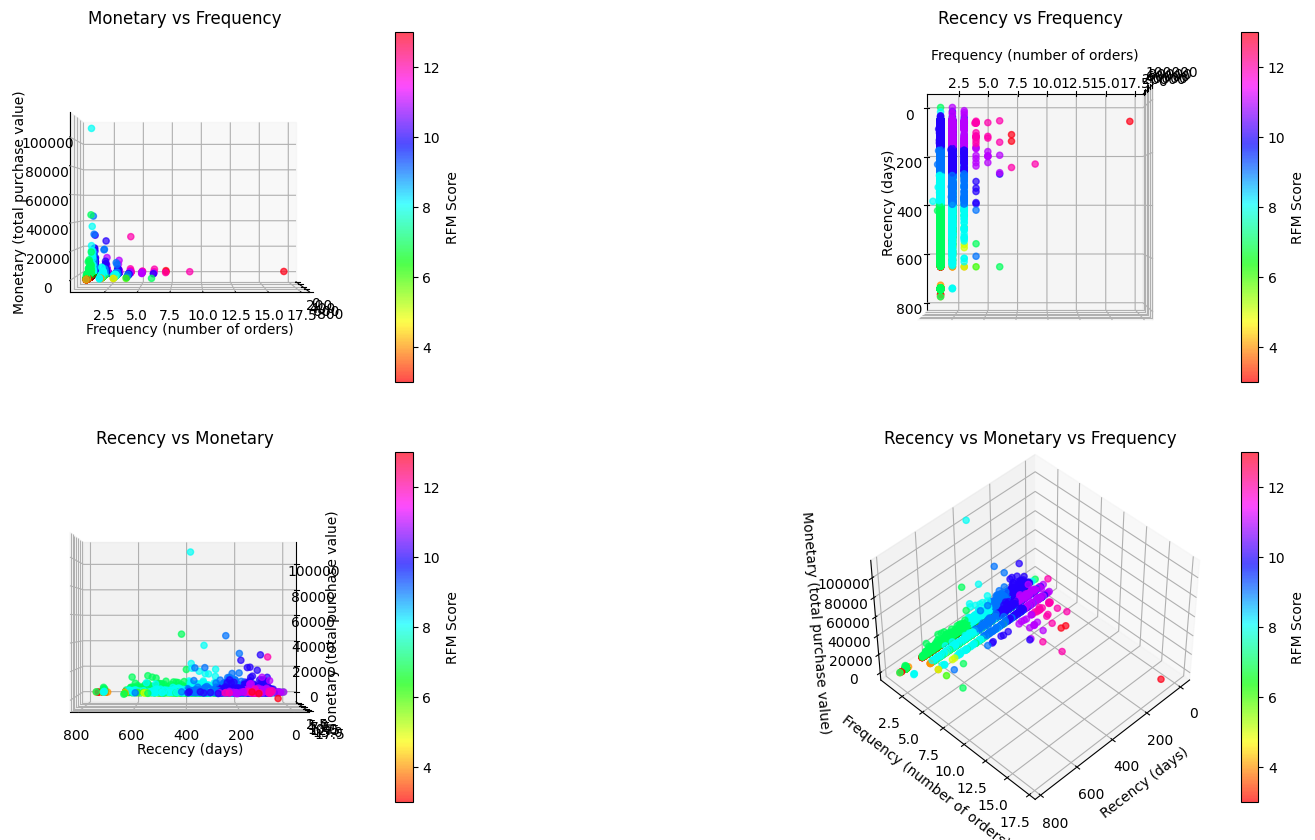

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the 'rfm' DataFrame defined

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), subplot_kw={'projection': '3d'})

# Front view
axes[0, 0].scatter(rfm_df['recency'], rfm_df['frequency'], rfm_df['monetary'], c=rfm_df['Total Score'], cmap='hsv', alpha=0.7)
axes[0, 0].set_title('Monetary vs Frequency')
axes[0, 0].view_init(elev=0, azim=0)

# Side view
axes[0, 1].scatter(rfm_df['recency'], rfm_df['frequency'], rfm_df['monetary'], c=rfm_df['Total Score'], cmap='hsv', alpha=0.7)
axes[0, 1].set_title('Recency vs Frequency')
axes[0, 1].view_init(elev=90, azim=0)

# Top view
axes[1, 0].scatter(rfm_df['recency'], rfm_df['frequency'], rfm_df['monetary'], c=rfm_df['Total Score'], cmap='hsv', alpha=0.7)
axes[1, 0].set_title('Recency vs Monetary')
axes[1, 0].view_init(elev=0, azim=90)

# Neutral view
axes[1, 1].scatter(rfm_df['recency'], rfm_df['frequency'], rfm_df['monetary'], c=rfm_df['Total Score'], cmap='hsv', alpha=0.7)
axes[1, 1].set_title('Recency vs Monetary vs Frequency')
axes[1, 1].view_init(elev=45, azim=45)  # Adjust for a more natural perspective

# Add labels and colorbar only to the first subplot
axes[0, 0].set_ylabel('Frequency (number of orders)')
axes[0, 0].set_zlabel('Monetary (total purchase value)')
fig.colorbar(axes[0, 0].collections[0], ax=axes[0, 0], label='RFM Score')

axes[0, 1].set_xlabel('Recency (days)')
axes[0, 1].set_ylabel('Frequency (number of orders)')
fig.colorbar(axes[0, 1].collections[0], ax=axes[0, 1], label='RFM Score')

axes[1, 0].set_xlabel('Recency (days)')
axes[1, 0].set_zlabel('Monetary (total purchase value)')
fig.colorbar(axes[1, 0].collections[0], ax=axes[1, 0], label='RFM Score')

axes[1, 1].set_xlabel('Recency (days)')
axes[1, 1].set_ylabel('Frequency (number of orders)')
axes[1, 1].set_zlabel('Monetary (total purchase value)')
fig.colorbar(axes[1, 1].collections[0], ax=axes[1, 1], label='RFM Score')

plt.show()


Dengan melihat diagram scatter 3d diatas dari 4 sudut pandang, maka dapat terlihat banyak sekali plot yang berdempetan (perilaku penggunanya berdasarkan RFM sama). Selain itu ada beberapa scatter plot yang terpisah dari gerombolan tersebut, hal ini awalnya saya duga sebagai outlier, tapi ternyata setelah ditelusuri, nilai yang diberikan masih tergolong masuk akal dan mungkin. Sehingga scatter plot terpisah tersebut bisa disimpulkan adalah orang-orang yang memiliki kebiasaan belanja berbeda dari yang lainnya (lebih royal dan lebih sering).

Karena Scatter Plot 3d ini saja tidak bisa menampilkan data dengan sangat jelas, maka kita gunakan cara tambahan untuk melihat kategorisasi lebih baik dengan nested pie

In [ ]:
rfm_df

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score,Segment,Total Score,Rank
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,161,1,141.90,4,1,4,414,Menjanjikan,9,B
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,164,1,27.19,4,1,1,411,Menjanjikan,6,C
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,586,1,86.22,1,1,2,112,Hibernasi,4,D
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,370,1,43.62,2,1,1,211,Hibernasi,4,D
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,337,1,196.89,2,1,4,214,Hibernasi,7,C
...,...,...,...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,496,1,4134.84,1,1,5,115,Hibernasi,7,C
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,311,1,84.58,2,1,2,212,Hibernasi,5,C
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,618,1,112.46,1,1,3,113,Hibernasi,5,C
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,169,1,133.69,3,1,3,313,Hampir Tidur,7,C


Membuat dataframe segmentasi dan rank

In [ ]:
# Menghitung jumlah customer_unique_id untuk setiap segment
segment_df = rfm_df.groupby('Segment')['customer_unique_id'].count().reset_index()

# Memberi nama kolom
segment_df.columns = ['Segment', 'Segment_Total_Customer']

# Menghitung jumlah customer_unique_id untuk setiap segment
rank_df = rfm_df.groupby('Rank')['customer_unique_id'].count().reset_index()

# Memberi nama kolom
rank_df.columns = ['Rank', 'Rank_Total_Customer']

In [ ]:
segment_df

,Segment,Segment_Total_Customer
0,Berisiko,11
1,Butuh Perhatian,13
2,Hampir Tidur,23996
3,Hibernasi,48010
4,Loyalis Potensial,855
5,Menjanjikan,23206
6,Pelanggan Setia,5


Membuat diagram segmentasi pelanggan

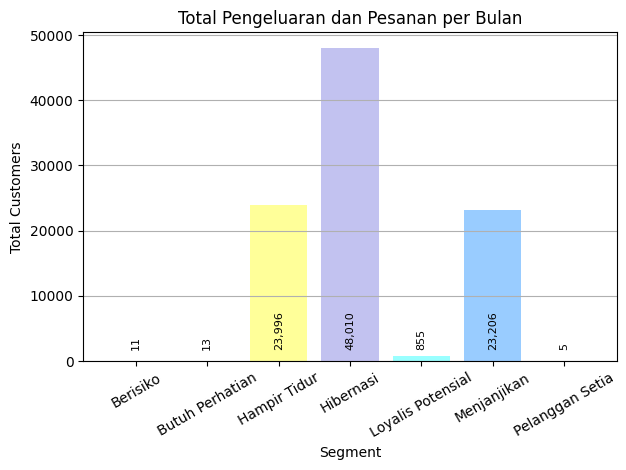

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = segment_df['Segment']
sizes = segment_df['Segment_Total_Customer']
colors = ['#ff9999', '#ffcc99', '#ffff99', '#c2c2f0', '#99ffff', '#99ccff', '#ccffff']

# Plot as a bar chart
plt.bar(labels, sizes, color=colors)

# Menambahkan angka detil ke masing-masing bar
for bar, value in zip(bars, segment_df['Segment_Total_Customer']):
    plt.text(bar.get_x() + bar.get_width() / 2, 2000, '{:,.0f}'.format(value), ha='center', color='black', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Total Customers')
plt.title('Distribusi Pelanggan Melalui Segmen')


# Menampilkan plot
plt.xticks(rotation=30)
plt.title('Segmentasi Pengguna Berdasarkan Behavior')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Berdasarkan data segmentasi pelanggan berdasarkan kombinasi rfm nya, terdapat 7 kategori pelanggan yaitu berisiko, butuh perhatian, hampir tidur, hibernasi, loyalis potensial, menjanjikan, dan pelanggan setia. Setelah melihat diagram ini, terlihat bahwa perilaku pengguna dari e-commerce ini sebagian sudah tidak menggunakan atau tidak aktif berbelanja lagi di sini.

Adapun pada pelanggan yang hampir tidur dan menjanjikan, memberikan  gambaran bahwa pelanggan yang aktif saat ini tidak dapat diharapkan dalam waktu yang panjang.

In [ ]:
rank_df

,Rank,Rank_Total_Customer
0,A,5459
1,B,24492
2,C,51519
3,D,14601
4,S,25


In [ ]:
pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 32.7 MB/s eta 0:00:00


Membuat diagram rank pelanggan

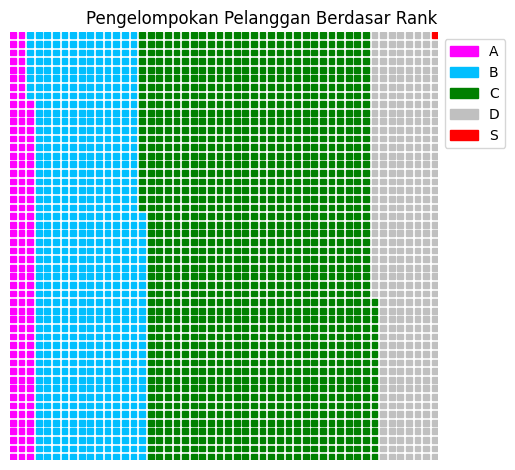

In [ ]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

# Data
value = dict(zip(rank_df['Rank'], rank_df['Rank_Total_Customer']))
# Waffle chart
plt.figure(
    FigureClass = Waffle,
    colors= ['#FF00FF', '#00BFFF', '#008000', '#C0C0C0', '#FF0000'],
    rows = 50,
    columns = 50,
    values = value,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    interval_ratio_x = 0.5,
    interval_ratio_y = 0.5,
    block_aspect_ratio = 1,
    title = {"label": "Pengelompokan Pelanggan Berdasar Rank", "loc": "right", "size": 12})

plt.show()

#### Export Data Frame Untuk Dashboard Streamlit

In [ ]:
import pandas as pd
import os
# kalau file belum ada : 
if not os.path.exists("dashboard"):
    os.makedirs("dashboard")
# Ganti setiap nama DataFrame dengan nama sebenarnya dari DataFrame Anda
sorted_df_cat.to_csv("dashboard/sorted_df_cat.csv", index=False)
sum_spend_df.to_csv("dashboard/sum_spend_df.csv", index=False)
buy_df.to_csv("dashboard/buy_df.csv", index=False)
top_products.to_csv("dashboard/top_products.csv", index=False)
customers_state.to_csv("dashboard/customers_state.csv", index=False)
customers_city.to_csv("dashboard/customers_city.csv", index=False)
customers_city_top30.to_csv("dashboard/customers_city_top30.csv", index=False)
customers_loc.to_csv("dashboard/customers_loc.csv", index=False)
rfm_df.to_csv("dashboard/rfm_df.csv", index=False)
segment_df.to_csv("dashboard/segment_df.csv", index=False)
rank_df.to_csv("dashboard/rank_df.csv", index=False)


## Conclusion

- **Conclusion pertanyaan 1 :**
1.   Pada tahun 2016-2018, terdapat fluktuasi tren pada tiap bulannya, mulai dari total belanja, total transaksi, dan jenis barang populer, semuanya selalu mengalami fluktuasi yang berbeda-beda di tiap bulannya.

2.   total belanja pelanggan dan total transaksi memiliki korelasi positif, dan korelasinya cukup tinggi, karena melihat dari kurva yang ada, tren yang terjadi pada 2 hal ini selalu serupa, jika pemesanan naik, maka total belanja juga naik, dan sebaliknya.

3. 5 Puncak total belanja beserta total transaksi, terjadi pada bulan yang sama yaitu november 2017, januari 2018, maret 2018, april 2018, dan mei 2018. Dengan produk yang berbeda beda pada tiap bulan tersebut yaitu bed-bath-table, health and beauty, dan computer accessories menjadi dominan.

4. Jika melihat kultur dan memperkirakan penyebab terjadinya peningkatan tren di 5 bulan tersebut, kita dapat berasumsi kalau pada bulan tersebut terdapat hari besar yang membuat pelanggan ingin berbelanja, misalnya black friday, all saints day, dan cyber monday yang terjadi di bulan november, ulang tahun tao paolo, tahun baru, karnaval, paskah, tiradentes, dan lainnya yang terjadi pada 5 bulan puncak tersebut. Selain kultur, musim, promosi, diskon, perekonomian,dan faktor lainnya juga mempengaruhi hal ini.

5. Jika kita perhatikan dengan seksama, tren puncak yang terjadi di 5 bulan tersebut tidak hanya terjadi di tahun itu, namun juga tahun sebelumnya, dengan skala belanja dan pemesanan yang lebih sedikit.

6. Produk yang paling sering juga mengalami trend fluctuation dimana, di awal furniture adalah barang yang diminati, namun seiring waktu produk populer ini berubah menjadi bed bath table, dan data terbaru menunjukkan produk kecantikan dan kesehatan menjadi produk paling disukai akhir-akhir ini (berdasarkan hari terakhir terekam)

7. Fluktuasi tren dapat memberikan peluang dan tantangan bagi perusahaan. Perusahaan dapat memanfaatkan tren untuk meningkatkan penjualan dan keuntungan. Namun, perusahaan juga harus siap untuk menghadapi perubahan tren dan menyesuaikan strategi bisnisnya. Strategi ini dapat berupa pemberian kupon di waktu tertentu, promo di hari besar, ataupun dengan melakukan campaign di waktu tertentu sesuai dengan fluktuasi yang telah diprediksi.



---



- **Conclusion pertanyaan 2 :**
1. Pada tahun 2016-2018 state yang memiliki pelanggan dengan jumlah tertinggi adalah state besar dan berada di area timur serta selatan brazil (tempat dimana populasi paling ramai), beberapa diantara state tersebut adalah sao paulo dan rio de janeiro, dan minas gerais.

2. Sementara pada kota yang memiliki pelanggan paling ramai pada periode tersebut juga selaras dengan state nya, kota yang berada pada state yang ramai biasanya juga memiliki penduduk yang cukup banyak, dan membuat kota yang memiliki pelanggan terbanyak juga merupakan kota-kota besar atau kota padat penduduk yang berada di state yang sama padatnya.

3. Segmentasi yang kita lakukan dengan menggunakan metode RFM menunjukkan kalau pelanggan sebenarnya bisa kita kategorikan dengan skala masing masing pada resensi, moneter, dan frekuensi diatur dalam range 1-5, yang  artinya kita memiliki 5^3 kombinasi yang bisa dijadikan kategorisasi, namun untuk mempermudah segmentasi, kita bagi menjadi 7, yaitu:

- frekuensi dan moneter rendah - Pelanggan dalam periode hibernasi
- frekuensi rendah dan moneter sedang - Pelanggan berada dalam risiko
- frekuensi rendah dan moneter tinggi - Pelanggan yang tak bisa kita lewatkan
- frekuensi sedang dan moneter rendah - Pelanggan yang hampir memasuki periode pasif
- frekuensi dan moneter sedang - Pelanggan yang memerlukan perhatian khusus
- frekuensi sedang dan moneter tinggi - Pelanggan setia
- frekuensi tinggi dan moneter rendah - Pelanggan yang menunjukkan potensi
- frekuensi tinggi dan moneter rendah diikuti resensi yang tidak jauh dari hari terakhir pemesanan - Pelanggan baru
- frekuensi tinggi dan moneter sedang - Pelanggan dengan potensi menjadi setia
- frekuensi tinggi dan moneter tinggi - Pelanggan paling berharga

4. Penyebaran segmentasi pelanggan ini tidak terdistribusi dengan cukup baik, dimana kebanyakan pengguna adalah pengguna yang hibernasi, disusul dengan pelanggan potensi menjadi setia, dan yang ketiga adalah pelanggan memasuki periode pasif. Sementara pelanggan setia adalah yang paling sedikit diantara seluruhnya, oleh karena inilah e-commerce harus segera memetakan strategi bisnis mereka dengan segera agar bisa meningkatkan loyalitas, frekuensi belanja, dan pembelian mereka dalam platform ini, karena jika dibiarkan, maka platform akan memiliki kemungkinan untuk stagnan atau mengalami pertumbuhan yang lambat sehingga gagal bersaing.

5. Selain penyebaran segmentasi pelanggan berdasarkan kebiasaannya, mereka juga telah kita kelompokkan dalam sebuah sistem rangking yang bisa membantu dalam menilai tindakan atau strategi yang harus dilakukan. Rank ini dinilai dengan menambahkan seluruh komponen resensi, moneter, dan frekuensi menjadi satu nilai, hal ini berfungsi sebagai alat penentu keputusan kedua selain berdasarkan behavior pelanggan. Adapun pengelompokannya sudah diatur dalam skala dari yang terendah yaitu D, C, B, A, S, SS, dan SSS.

6. Sebagian besar pelanggan adalah pelanggan dengan rank C dan B, yang diikuti dengan rank D, A, dan terakhir S. Tidak ada pelanggan yang mencapai rank SS ataupun SSS, hal ini menunjukkan kalau pelanggan sebagian besar adalah pelanggan yang masih kurang loyal ataupun sering berbelanja disini.


7. Sama dengan kesimpulan untuk pertanyaan pertama, e-commerce harus segera melakukan penyesuaian strategi marketing untuk meningkatkan skor RFM penggunanya. Mengetahui tempat dengan konsentrasi penduduk besar dan sebagian penggunanya terkategori memiliki segmentasi dan rank rendah bisa menjadi acuan untuk menentukan strategi tempat proposi, kampanye, dan juga penentuan kampanye apa yang tepat untuk masing-masing daerah.

---



**Kesimpulan keseluruhan :**
- E-commerce bisa menyusun strategi yang sesuai dengan kebutuhannya berdasarkan data hasil analisa.

- Fluktuasi tren menunjukkan  peluang untuk meningkatkan penjualan di periode waktu tertentu. Rekomendasi aksi yang disarankan untuk hal ini adalah:
Membuat kampanye khusus di hari besar seperti Black Friday, All Saints Day, Cyber Monday, Tahun Baru, Karnaval, dan Paskah.
Tawarkan diskon dan promo menarik pada produk populer di tiap momen puncak.
- Mayoritas pelanggan adalah hibernasi dan potensi menjadi setia, menunjukkan peluang untuk meningkatkan loyalitas dan frekuensi belanja. adapun strategi yang disarankan adalah : Mengimplementasikan program loyalitas untuk pelanggan setia, seperti pemberian poin, cashback, dan reward lainnya. Gunakan personalisasi dan targeted marketing untuk meningkatkan engagement dan konversi pelanggan. E-commerce bisa juga melakukan promo comeback customer agar pelanggan hibernasi mau mencoba berbelanja kembali.
- Adapun hal tambahan yang bisa diberikan adalah : Mengirimkan email marketing kepada pelanggan hibernasi dengan rekomendasi produk berdasarkan kategori yang pernah mereka beli sebelumnya. Memberikan diskon khusus kepada pelanggan potensi menjadi setia untuk mendorong mereka berbelanja lebih sering.Menampilkan produk yang dipersonalisasi di halaman utama website atau aplikasi e-commerce berdasarkan riwayat pembelian dan minat pelanggan.
Memberikan layanan customer service yang excellent untuk meningkatkan kepuasan pelanggan.